<a href="https://colab.research.google.com/github/RishabKr15/Online-Retail-Customer-Segementation/blob/main/Unsupervised_ML_Myntra_Online_Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Online Retail Customer Segmentation



# **Project Type**    - Unsupervised ML
# **Contribution**    - Rishabh Kumar(Individual)


# **Project Summary -**

- This project focuses on Online Retail Customer Segmentation, a vital aspect of modern business. By categorizing customers into distinct groups based on their characteristics, businesses can gain valuable insights and tailor their strategies to meet the unique needs of each segment.

- The objective of this project was to analyze a transnational dataset from a UK-based online retail company specializing in all-occasion gifts. The dataset covered a period of time from 01/12/2010 to 09/12/2011 and included transactions made by individual customers as well as wholesalers.

- To achieve this, I utilized the Recency-Frequency-Monetary (RFM) model, which assigns quantitative values to customers based on three key dimensions: recency of their last purchase, frequency of their transactions, and monetary value of their purchases. By leveraging advanced clustering algorithms such as K-Means, Agglomerative Hierarchical Clustering, and DBSCAN, I successfully segmented the customers into distinct groups.

- The project involved various steps, including data inspection, exploratory data analysis (EDA), data preparation, RFM model creation, and implementation of clustering models. Through these steps, I gained meaningful insights into customer behavior, identified key customer segments, and drew valuable conclusions that can guide targeted marketing strategies and enhance customer satisfaction.

- Overall, this project showcased my expertise in data analysis, customer segmentation, and implementation of clustering algorithms. The insights obtained from this project can empower businesses to optimize their offerings, improve customer experiences, and drive growth in the competitive online retail industry.

# **GitHub Link -**

https://github.com/RishabKr15/Online-Retail-Customer-Segementation/tree/main

# **Problem Statement**


The objective of this project is to develop a customer segmentation model for an online retail business in order to gain valuable insights into the customer base and implement targeted strategies to enhance customer satisfaction, increase sales, and optimize marketing efforts. By analyzing transactional data and customer attributes such as purchasing behavior, demographics, and geographic location, the project aims to create meaningful customer segments that can drive personalized marketing campaigns, improve inventory management, and foster customer loyalty.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import math
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#pd.set_option('display.max_columns', 500)

plt.style.use('ggplot')

import missingno as msno


from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#loading dataset
df = pd.read_excel('/content/drive/MyDrive/AlmaBetter/Online Retail.xlsx')


### Dataset First View

In [ ]:
# Dataset First Look
# Displaying the first 5 rows of the dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# Displaying the last 5 rows of the dataset
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
# Sample of the dataset
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
98385,544678,72801D,4 SKY BLUE DINNER CANDLES,3,2011-02-22 16:15:00,1.25,13077.0,United Kingdom
511067,579471,23241,TREASURE TIN GYMKHANA DESIGN,1,2011-11-29 15:08:00,4.13,NaN,United Kingdom
428766,573499,21192,check,-164,2011-10-31 12:01:00,0.00,NaN,United Kingdom
385682,570211,23330,DECORATIVE WICKER HEART MEDIUM,1,2011-10-09 11:15:00,1.25,13558.0,United Kingdom
31198,538903,22360,GLASS JAR ENGLISH CONFECTIONERY,6,2010-12-15 10:17:00,2.95,13496.0,United Kingdom


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
rows , columns = df.shape
print(f'The dataset has', rows, 'rows and', columns, 'columns')

The dataset has 541909 rows and 8 columns


### Columns

In [ ]:
# The total number of columns in the dataset

print('The total number of columns in the dataset: ', df.shape[1], '\nThese are:')

count = 1
for col in df.columns.to_list():
  print(count,'.', col)
  count += 1

The total number of columns in the dataset:  8 
These are:
1 . InvoiceNo
2 . StockCode
3 . Description
4 . Quantity
5 . InvoiceDate
6 . UnitPrice
7 . CustomerID
8 . Country


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


**The dataset contains 541909 rows and 8 columns.**

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'The total number of duplicated values in the dataset: {dup}')

The total number of duplicated values in the dataset: 5268


#### Missing Values/Null Values

In [ ]:
missing = df.columns[df.isnull().any()].tolist()
missing
round(df[missing].isnull().mean() * 100, 2).sort_values(ascending = False)

,0
CustomerID,24.93
Description,0.27


In [ ]:
# Missing Values/Null Values Count
missing = df.columns[df.isnull().any()].tolist()
missing

print('Missing Data Count')
print(df[missing].isnull().sum().sort_values(ascending=False))
print()

print('++' *12)
print()
print('Missing Data Percentage')
print(round(df[missing].isnull().mean()*100,2).sort_values(ascending=False))


Missing Data Count
CustomerID     135080
Description      1454
dtype: int64

++++++++++++++++++++++++

Missing Data Percentage
CustomerID     24.93
Description     0.27
dtype: float64


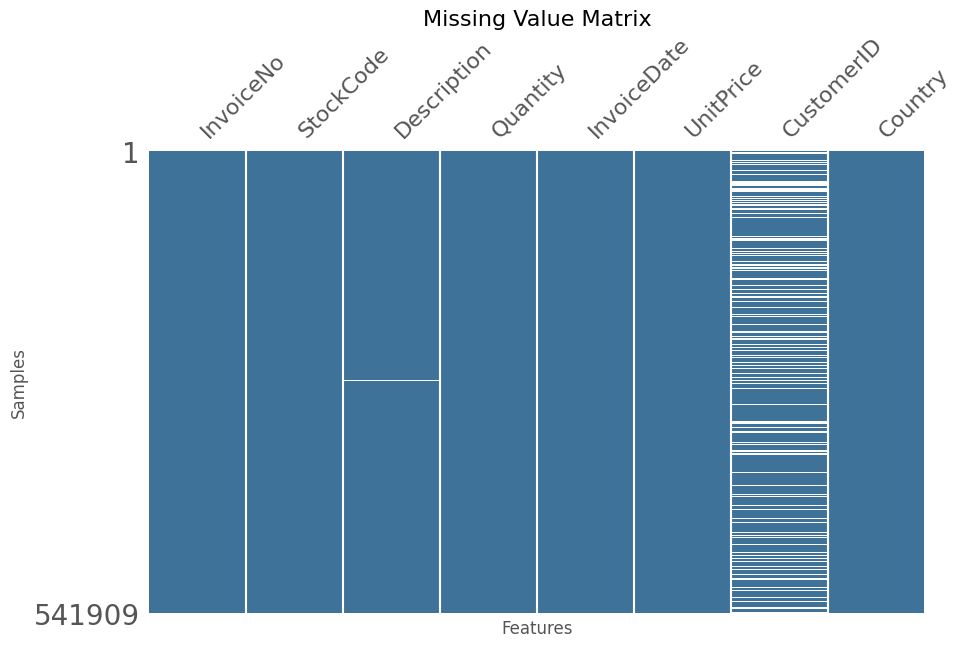

In [ ]:
# Visualizing the missing values
import missingno as msno

# create missing value matrix plot
msno.matrix(df, figsize=(10,6), sparkline=False, color=(0.25, 0.45, 0.6))

# customize plot
plt.title('Missing Value Matrix', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Samples', fontsize=12)
plt.show()


**Observation:**
- 24.93% of items purchased are not assigned to any customer. Hence there is no use of having the data with no customer assignment. Because we can't form clusters without CustomerID so we will delete them from dataset.

### What did you know about your dataset?

- **The dataset is of transnational dataset which contains all the transactions occuring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.**
- **The company mainly sells unique all-occassion gifts.**
- **Many customers of the company are wholesalers.**
- **The dataset contains 541909 rows and 8 columns.**
- **There are 2 columns of datatype float64, 1 column of datatype int64, 4 columns of datatype object and 1 column of datatype datetime64.**
- **The total number of duplicated values in the dataset: 5268**
- **Missing Data Percentage**
     - **CustomerID -    24.93%**
     - **Description -     0.27%**

## ***Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
# Dataset Describe
# Statistical summary of the dataset
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,541909.0,9.55225,-80995.0,1.0,3.0,10.0,80995.0,218.081158
InvoiceDate,541909,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
UnitPrice,541909.0,4.611114,-11062.06,1.25,2.08,4.13,38970.0,96.759853
CustomerID,406829.0,15287.69057,12346.0,13953.0,15152.0,16791.0,18287.0,1713.600303


### Variables Description

- **InvoiceNo:** This variable represents the invoice or transaction number assigned to each purchase. It serves as a unique identifier for each transaction. Data type: Nominal, 6-digit integral number (including 'c' prefix for cancellations).

- **StockCode:** The StockCode variable corresponds to a code or identifier assigned to each distinct product in the inventory. It helps identify specific products purchased by customers. Data type: Nominal, 5-digit integral number.

- **Description:** The Description variable provides a brief description or name of the product purchased in each transaction. It gives a textual representation of the product. Data type: Nominal.

- **Quantity:** This variable denotes the quantity of each product purchased in a transaction. It represents the number of units of a particular product bought by the customer. Data type: Integer.

- **InvoiceDate:** The InvoiceDate variable indicates the date and time when each transaction took place. It helps track the timing and frequency of customer purchases. Data type: DateTime.

- **UnitPrice:** This variable represents the price of each unit of the product in the local currency (e.g., sterling, dollars, euros). It provides information about the cost of the product per unit. Data type: Float.

- **CustomerID:** The CustomerID variable serves as a unique identifier assigned to each customer. It helps track individual customer behavior and preferences. Data type: Float.

- **Country:** The Country variable represents the country where each customer resides or where the transaction took place. It provides information about the geographic location of customers. Data type: Nominal, country name.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("Number of unique values in",i,"is",df[i].nunique())

Number of unique values in InvoiceNo is 25900
Number of unique values in StockCode is 4070
Number of unique values in Description is 4223
Number of unique values in Quantity is 722
Number of unique values in InvoiceDate is 23260
Number of unique values in UnitPrice is 1630
Number of unique values in CustomerID is 4372
Number of unique values in Country is 38


##***Data Wrangling***

### Data Wrangling Code

In [ ]:
#checking for missing values
df.isnull().sum().sort_values(ascending=False)


,0
CustomerID,135080
Description,1454
InvoiceNo,0
StockCode,0
Quantity,0
InvoiceDate,0
UnitPrice,0
Country,0


**Here we have null values present in the dataset. There are 135080 null values in cutomer_id and 1454 null values in Description. We can drop those null values in customerID  as we are making customer segmentation and keeping those null values make no sense**

In [ ]:
#dropping null values
df.dropna(inplace=True)

In [ ]:
#checking for null values again
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


**All the null/missing values are removed**

In [ ]:
#Checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [ ]:
#checking shape
df.shape

(406829, 8)

 After removing null value from our dataset.

Now we have 406829 rows and 8 columns in our dataset.

In [ ]:
# checking for duplicated records
df.duplicated().sum()

5225

In [ ]:
# drop the duplicated records
df.drop_duplicates(inplace=True)


In [ ]:
# checking for duplicates again
df.duplicated().sum()

0

In [ ]:
df.shape

(401604, 8)

 * We have treated the missing values and the duplicated records. After removal of these values, the shape of our dataset is (401604, 8).

* We will now check for the cancelled orders.

In [ ]:
# checking for order cancellations
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df[df['InvoiceNo'].str.startswith('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


* There are 8872 records where the orders are cancelled and the quantity contains a negative value.

* We will drop these cancelled order records from our analysis.

In [ ]:
# consider only the non cancelled orders
df = df[~df['InvoiceNo'].str.startswith('C')]

# check the shape of the data after removing cancelled orders
df.shape

(392732, 8)

In [ ]:
# description of the dataset
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,392732.000000,392732,392732.000000,392732.000000
mean,13.153718,2011-07-10 19:15:24.576301568,3.125596,15287.734822
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13955.000000
50%,6.000000,2011-07-31 12:02:00,1.950000,15150.000000
75%,12.000000,2011-10-20 12:53:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,181.588420,NaN,22.240725,1713.567773


* There are no negative values in the Quantity and UnitPrice column now.

* But we can still see a minimum value of 0 in the UnitPrice column which cannot be real as a store cannot sell items for free.

* We will investigate this column and remove those records.

In [ ]:
# checking the columns having zero unit price
df[df['UnitPrice'] == 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2011-01-13 15:10:00,0.0,15107.0,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2011-02-10 13:08:00,0.0,17560.0,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23 10:25:00,0.0,13239.0,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2011-03-30 12:45:00,0.0,13113.0,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04 14:42:00,0.0,14410.0,United Kingdom


* There are few records with zero values in UnitPrice which cannot be true so we will drop these records.

In [ ]:
# only consider UnitPrice greater than zero
df = df[df['UnitPrice'] > 0]

# check description of UnitPrice after dropping
df['UnitPrice'].describe()

,UnitPrice
count,392692.000000
mean,3.125914
std,22.241836
min,0.001000
25%,1.250000
50%,1.950000
75%,3.750000
max,8142.750000


In [ ]:
# first 5 rows of the data
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# shape of the dataset
df.shape

(392692, 8)

* Our dataset is almost a cleaned one now and we can move to EDA but before that we can create some additional features for our dataset.

## ***Feature Engineering & Data Pre-processing***

#### Feature engineering is a machine learning technique that leverages data to create new variables that aren’t in the training set. It can produce new features for both supervised and unsupervised learning, with the goal of simplifying and speeding up data transformations while also enhancing model accuracy. It involves selecting, modifying, or creating new features that will help improve the performance of machine learning models or enhance analysis. This step might include encoding categorical variables, scaling numerical features, or creating interaction terms.

In [ ]:
# converting invoicedate column into datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format = "%m/%d/%y %H:%M")

In [ ]:
# create some new features from invoice date
df['day'] = df['InvoiceDate'].dt.day_name()
df['year'] = df['InvoiceDate'].apply(lambda x: x.year)
df['month_num'] = df['InvoiceDate'].apply(lambda x: x.month)
df['day_num'] = df['InvoiceDate'].apply(lambda x: x.day)
df['hour'] = df['InvoiceDate'].apply(lambda x: x.hour)
df['minute'] = df['InvoiceDate'].apply(lambda x: x.minute)
df['month'] = df['InvoiceDate'].dt.month_name()

In [ ]:
# creating TotalAmount from Quantity and UnitPrice
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

In [ ]:
# top 5 rows of the data
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day,year,month_num,day_num,hour,minute,month,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,20.34


## ***Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Bar Chart for Top Selling products

In [ ]:
# Group the dataset by Description column and calculate the sum of the quantity sold for each product
# Select the top 10 products
product = df.groupby('Description')['Quantity'].sum().sort_values(ascending = False).head(10)

# Create the dataframe containing the top 10 selling products
top_product = pd.DataFrame({'Product': product.index, 'Quantity Sold': product.values})
top_product



,Product,Quantity Sold
0,"PAPER CRAFT , LITTLE BIRDIE",80995
1,MEDIUM CERAMIC TOP STORAGE JAR,77916
2,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54319
3,JUMBO BAG RED RETROSPOT,46078
4,WHITE HANGING HEART T-LIGHT HOLDER,36706
5,ASSORTED COLOUR BIRD ORNAMENT,35263
6,PACK OF 72 RETROSPOT CAKE CASES,33670
7,POPCORN HOLDER,30919
8,RABBIT NIGHT LIGHT,27153
9,MINI PAINT SET VINTAGE,26076


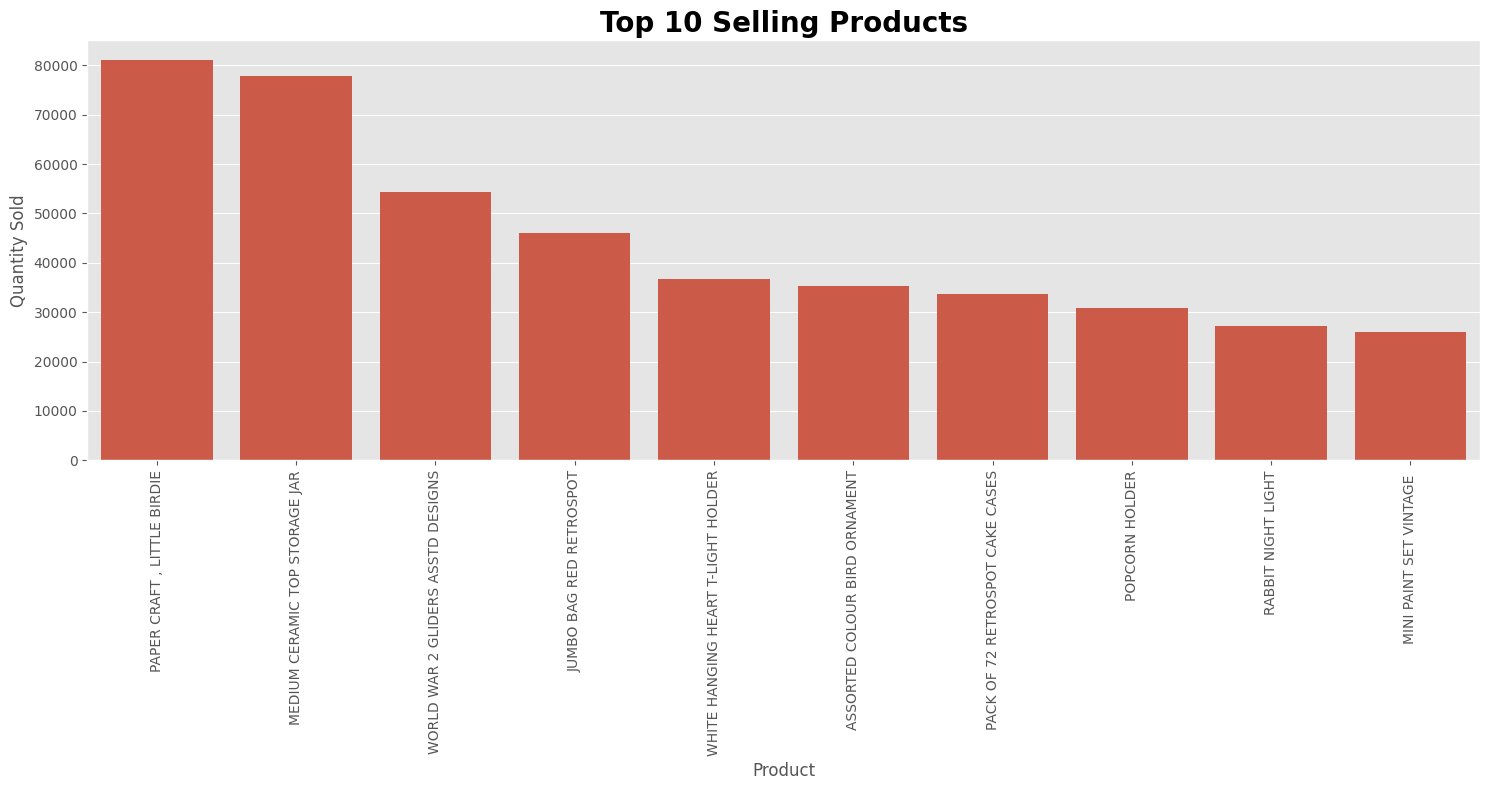

In [ ]:
#chart 1: Visualization code
# Plot bar chart
plt.figure(figsize = (15, 8))
sns.barplot(top_product, x = 'Product', y = 'Quantity Sold')

# Set the title
plt.title('Top 10 Selling Products', size=20, fontweight='bold')
#plt.xlabel('Product', size = 15)
#plt.ylabel('Quantity Sold', size = 15)

# Rotate the x-axis labels
plt.xticks(rotation = 90)

# Display the chart
plt.tight_layout()


##### 1. Why did you pick the specific chart?

- A bar chart is a good choice for showing the quantity of each product sold as it allows for easy comparison between the different products. It is also effective in highlighting the top 10 selling products.

- This chart shows the quantity of each of the top 10 selling products, providing insight into the most popular items. It also allows for comparison between the different products and their respective quantities sold.


##### 2. What is/are the insight(s) found from the chart?

The data reveals that "PAPER CRAFT, LITTLE BIRDIE" is the top-selling product, indicating high demand for creative and craft-related items. Storage and utility products, like the "MEDIUM CERAMIC TOP STORAGE JAR", and retro-themed items also show strong sales, suggesting popular customer preferences. Seasonal or decorative products like "WHITE HANGING HEART T-LIGHT HOLDER" may perform better during holidays, offering opportunities for targeted campaigns. Expanding successful product lines and optimizing inventory for top sellers can boost revenue. Cross-selling and bundling related items could further enhance customer spending and overall profitability.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Yes, the insights gained from this chart can help businesses to make informed decisions about their inventory management, marketing strategies, and overall business operations. By identifying the most popular products, businesses can focus their efforts on these items and potentially increase sales and profits.

#### Chart - 2 - Bar Chart for least selling products

In [ ]:
# Group the dataset by Description column and calculate the sum of the quantity sold for each product
# Select the top 10 products
product = df.groupby('Description')['Quantity'].sum().sort_values(ascending = False).tail(10)

# Create the dataframe containing the top 10 selling products
least_selling_product = pd.DataFrame({'Product': product.index, 'Quantity Sold': product.values})
least_selling_product

,Product,Quantity Sold
0,BLACK DROP EARRINGS W LONG BEADS,1
1,FIRE POLISHED GLASS BRACELET BLACK,1
2,SET/6 IVORY BIRD T-LIGHT CANDLES,1
3,PURPLE FRANGIPANI HAIRCLIP,1
4,CAKE STAND LACE WHITE,1
5,PINK POLKADOT KIDS BAG,1
6,WHITE ROSEBUD PEARL EARRINGS,1
7,HEN HOUSE W CHICK IN NEST,1
8,CAPIZ CHANDELIER,1
9,EASTER CRAFT IVY WREATH WITH CHICK,1


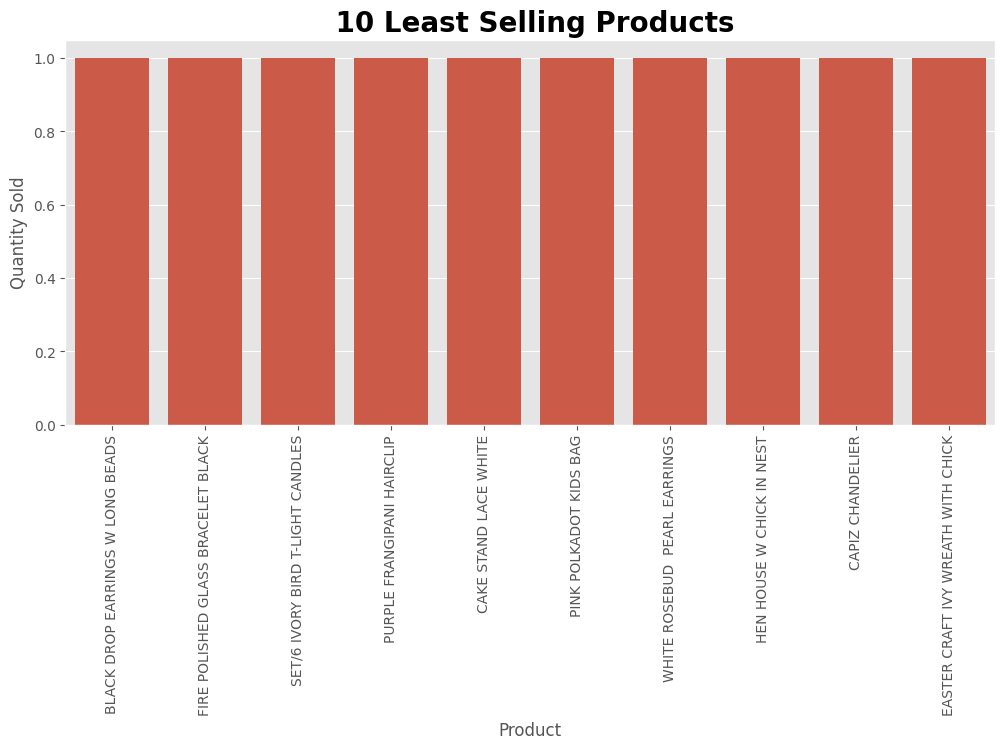

In [ ]:
# Plotting the 10 least selling products as a
plt.figure(figsize = (12, 5))
sns.barplot(least_selling_product, x = 'Product', y = 'Quantity Sold')

# Set title
plt.title(' 10 Least Selling Products', size = 20, fontweight = 'bold')
#plt.xlabel('Product', size = 15)
#plt.ylabel('Quatity Sold', size = 15)

plt.xticks(rotation = 90);

##### 1. Why did you pick the specific chart?

- A bar chart is a suitable choice for representing the top 10 least selling products as it provides a clear and concise visual comparison between the products in terms of their sales volume. It also allows for easy identification of the products with the lowest sales figures.

- The chart provides insights into which products have had the lowest sales volume, which can be useful information for businesses to determine which products may need to be discounted or promoted in order to increase sales.

##### 2. What is/are the insight(s) found from the chart?

-  We got the information about the least selling products that are listed below having sold 1 quantity each

1 SILVER AND BLACK ORBIT NECKLACE	1

2	ORANGE FELT VASE + FLOWERS	1

3	CRACKED GLAZE EARRINGS RED	1

4	CRACKED GLAZE EARRINGS BROWN	1

5	PACK 4 FLOWER/BUTTERFLY PATCHES	1

6	BLACK VINT ART DEC CRYSTAL BRACELET	1

7	FLOWER SHOP DESIGN MUG	1

8	SET 36 COLOURING PENCILS DOILEY	1

9	HEN HOUSE W CHICK IN NEST	1

10	AMBER BERTIE GLASS BEAD BAG CHARM

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

-  The insights gained from this chart could help create a positive business impact by allowing businesses to identify products that are not selling well and take action to improve their sales volume. For example, businesses may choose to offer discounts or promotions on the least selling products, or discontinue products that consistently have low sales volume to focus on more profitable products.

#### Chart - 3

In [ ]:
# Creating dataframe containing only top 5 customers
top_customers = df['CustomerID'].value_counts().reset_index().rename(columns = {'count' : 'Count', 'Count':  'CustomerID'}).head(5)

top_customers

,CustomerID,Count
0,17841.0,7676
1,14911.0,5670
2,14096.0,5111
3,12748.0,4412
4,14606.0,2677


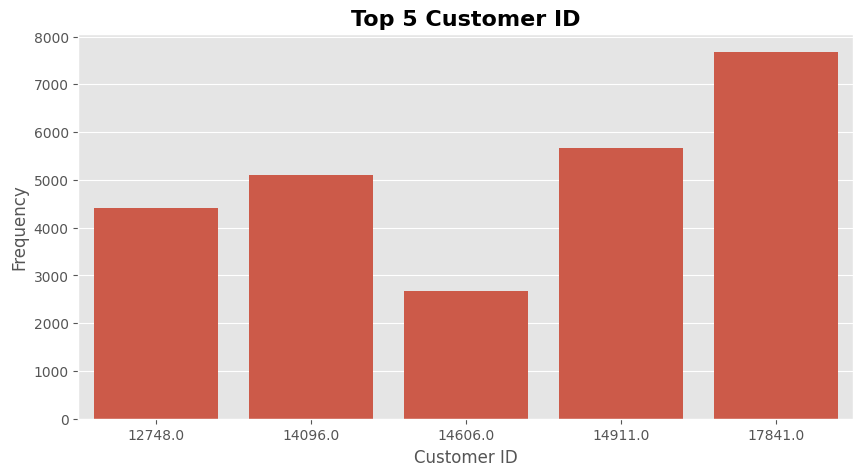

In [ ]:
plt.figure(figsize = (10, 5))

# Create the bar plot
sns.barplot(data = top_customers, x = 'CustomerID', y = 'Count')

# Add labels and a title
plt.title('Top 5 Customer ID', fontsize = 16, fontweight = 'bold')
plt.xlabel('Customer ID')
plt.ylabel('Frequency');


##### 1. Why did you pick the specific chart?

-  A bar graph was chosen because it is a clear and simple way to display and compare the frequency of each of the top 5 customer IDs.



##### 2. What is/are the insight(s) found from the chart?

- The chart provides insight into the customers who make the most purchases from the business and helps identify potential loyal customers or areas for improvement in customer retention.

- The customers having the customer_id 17841.0,	14911.0, 14096.0, 12748.0, 14606.0	are the top 5 customers


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Yes, the insights gained from the chart can help create a positive business impact by informing strategies to retain and attract more customers, as well as identifying areas for improvement in customer service and product offerings.

#### Chart - 4

In [ ]:
#count of stockcode_name as higher count comes first
StockCode_df=df['StockCode'].value_counts().reset_index().head()
StockCode_df.rename(columns={'StockCode': 'StockCode_Name'}, inplace=True)
StockCode_df.rename(columns={'count': 'Count'}, inplace=True)
StockCode_df

,StockCode_Name,Count
0,85123A,2023
1,22423,1713
2,85099B,1615
3,84879,1395
4,47566,1389


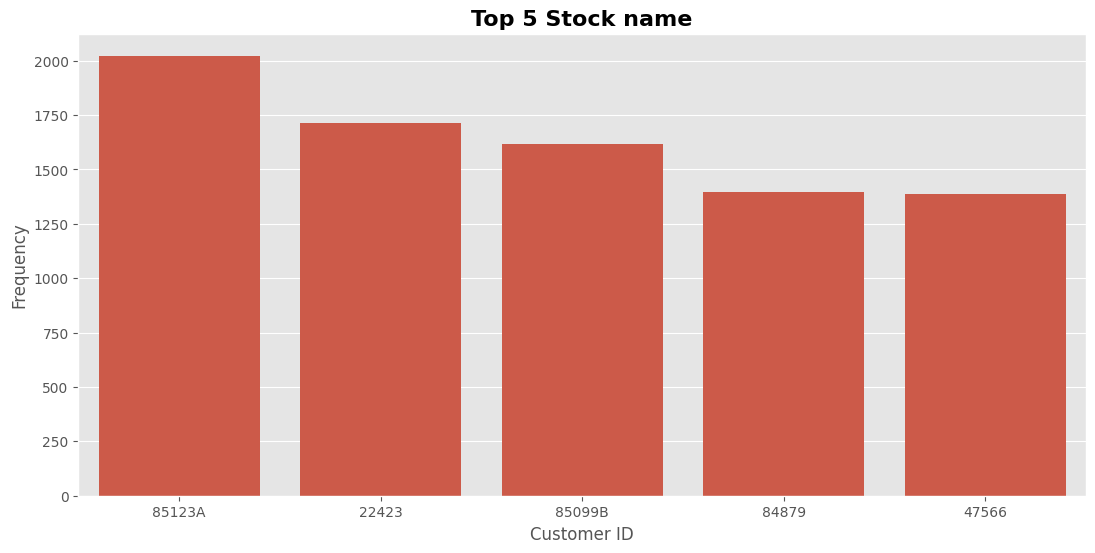

In [ ]:
#visualization of count of stock name
plt.figure(figsize=(13,6))
sns.barplot(data=StockCode_df,x='StockCode_Name',y='Count',)
# Add labels and a title
plt.title('Top 5 Stock name', fontsize = 16, fontweight = 'bold')
plt.xlabel('Customer ID')
plt.ylabel('Frequency')
plt.show()


##### 1. Why did you pick the specific chart?

- A bar graph was chosen because it is a clear and simple way to display and compare the frequency of each of the stock names.

##### 2. What is/are the insight(s) found from the chart?

- Top 5 Stock name based on selling are :
  
  1.85123A

  2.22423

  3.85099B

  4.84879

  5.47566

- The stockcode_name with 85123A	, 22423, 85099B, 84879, 47566 are the top 5 stocks.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The top 5 stock codes, 85123A, 22423, 85099B, 84879, and 47566, highlight high-demand products that can positively impact the business. Prioritizing these items for inventory management and promotional efforts ensures consistent sales and customer satisfaction. Additionally, these insights can guide product expansion and resource allocation for higher ROI. However, there are potential risks, such as overstocking if demand declines or becoming overly reliant on these few items. Neglecting other products could also reduce product diversity and miss growth opportunities. To maximize benefits, it is crucial to balance focus on top-performing items with market analysis and diversification strategies.








#### Chart - 5

In [ ]:
#count of stockcode_name as higher count comes first
StockCode_df2=df['StockCode'].value_counts().reset_index().tail()
StockCode_df2.rename(columns={'StockCode': 'StockCode_Name'}, inplace=True)
StockCode_df2.rename(columns={'count': 'Count'}, inplace=True)
StockCode_df2

,StockCode_Name,Count
3660,90059A,1
3661,20678,1
3662,90059D,1
3663,90168,1
3664,23843,1


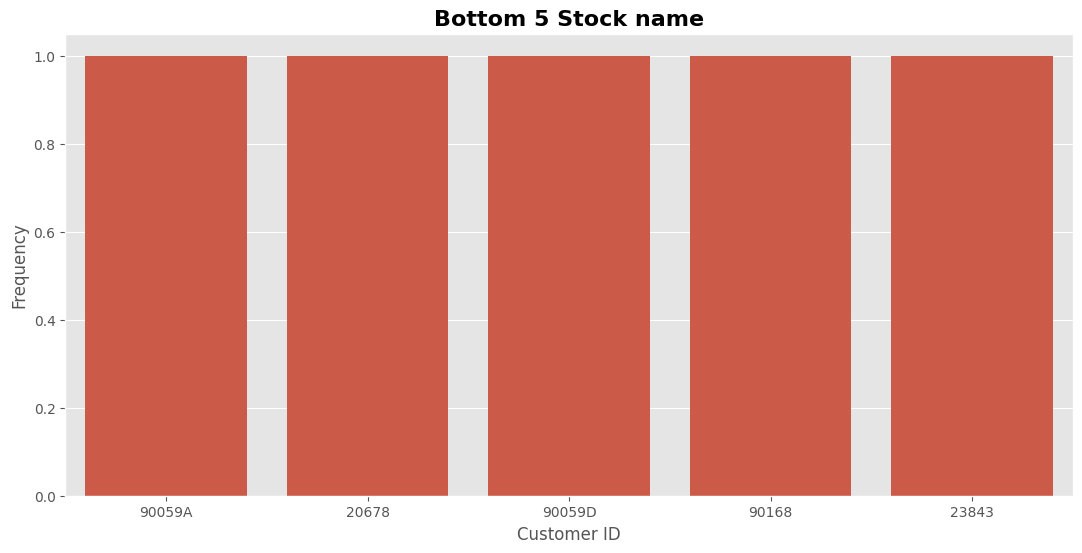

In [ ]:
#visualization of bottom 5 stock name
plt.figure(figsize=(13,6))
sns.barplot(data=StockCode_df2,x='StockCode_Name',y='Count',)
# Add labels and a title
plt.title('Bottom 5 Stock name', fontsize = 16, fontweight = 'bold')
plt.xlabel('Customer ID')
plt.ylabel('Frequency')
plt.show()


##### 1. Why did you pick the specific chart?

A bar graph was chosen because it is a clear and simple way to display and compare the frequency of least sold stock names.

##### 2. What is/are the insight(s) found from the chart?

Bottom 5 Stock name based on selling are :

1. 90168

2. 90169

3. 90202A

4. 90118

5. 23843

The stockcode_name with 90168, 90169, 90202A, 90118, 23843 are the least 5 sold stocks.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The bottom 5 stock codes, 90168, 90169, 90202A, 90118, and 23843, indicate products with minimal sales, suggesting low customer demand. This insight can create a positive business impact by identifying underperforming items for review. Strategies such as redesigning, repricing, or promoting these products may improve sales. Alternatively, phasing out consistently low-selling items can free up storage space and reduce holding costs. However, misinterpreting these insights could lead to negative growth if potentially valuable niche products are discontinued prematurely. A thorough analysis of factors like marketing efforts, product quality, and customer preferences is essential before taking action to avoid missed opportunities and ensure better resource allocation.

#### Chart - 6

In [ ]:
# Top 5 countries based on the counts in the data
country_df=df['Country'].value_counts().reset_index().head()
country_df.rename(columns={'Country': 'Country_name'}, inplace=True)
country_df.rename(columns={'Count': 'Count'}, inplace=True)
country_df

,Country_name,count
0,United Kingdom,349203
1,Germany,9025
2,France,8326
3,EIRE,7226
4,Spain,2479


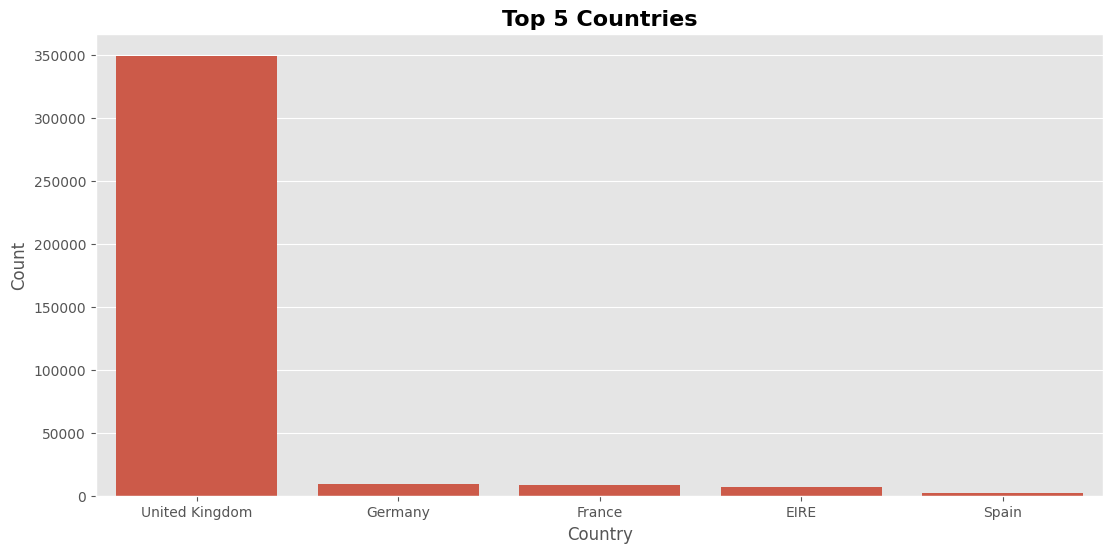

In [ ]:
#visualization of top 5 countries by sales
plt.figure(figsize=(13,6))
sns.barplot(data=country_df,x='Country_name',y='count',)
# Add labels and a title
plt.title('Top 5 Countries', fontsize = 16, fontweight = 'bold')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()


##### 1. Why did you pick the specific chart?

- A bar graph was chosen because it is a clear and simple way to display and compare the frequency of each of the top 5 countries.

##### 2. What is/are the insight(s) found from the chart?

The chart provides insight that the most of the customers are from United Kingdom that make sense as company is a UK based after that we have Germany ,France ,EIRE and Spain.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights reveal that most customers are from the UK, followed by Germany, France, EIRE, and Spain, which aligns with the company’s UK-based operations. This creates a positive impact by enabling localized marketing efforts in the UK and targeted strategies for other key European markets. It also helps optimize logistics and inventory management for high-demand regions. However, over-reliance on the UK market poses risks from economic or regulatory changes. Additionally, insufficient focus on emerging markets or ignoring cultural preferences in non-UK regions may lead to missed opportunities. A balanced approach, focusing on core markets while exploring growth in other regions, is essential for sustainable growth.

#### Chart - 7

In [ ]:
# Bottom 5 countries based on the counts in the data
country_df2=df['Country'].value_counts().reset_index().tail()
country_df2.rename(columns={'Country': 'Country_name'}, inplace=True)
country_df2.rename(columns={'Count': 'Count'}, inplace=True)
country_df2

,Country_name,count
32,Lithuania,35
33,Brazil,32
34,Czech Republic,25
35,Bahrain,17
36,Saudi Arabia,9


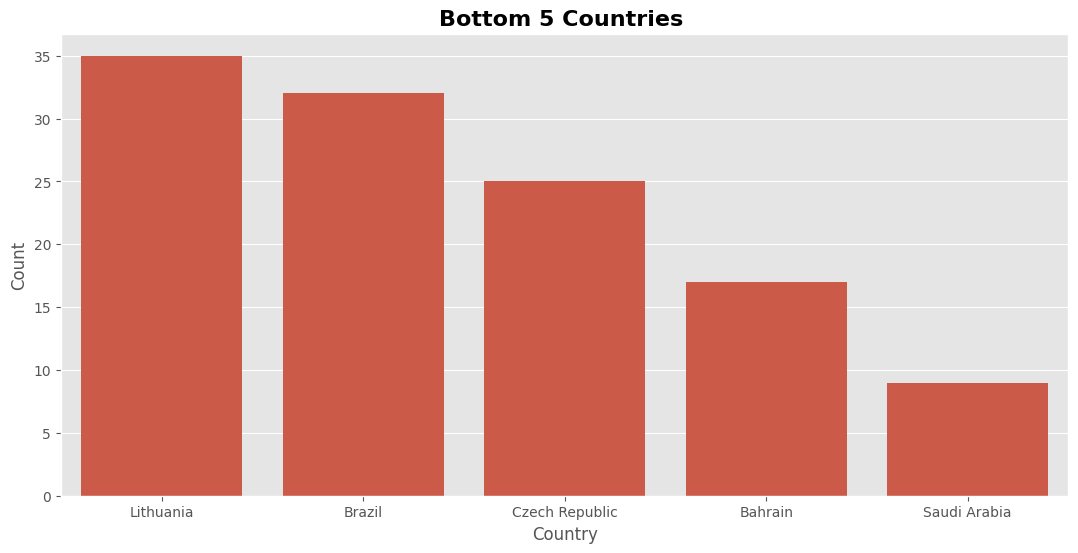

In [ ]:
#visualization of top 5 countries by sales
plt.figure(figsize=(13,6))
sns.barplot(data=country_df2,x='Country_name',y='count',)
# Add labels and a title
plt.title('Bottom 5 Countries ', fontsize = 16, fontweight = 'bold')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()


##### 1. Why did you pick the specific chart?

- A bar graph was chosen because it is a clear and simple way to display and compare the frequency of each of the bottom 5 countries.

##### 2. What is/are the insight(s) found from the chart?

The chart provides insight that the least number of customers are from Lithuania, Brazil , Czeck Republic, Bahrain, Saudi Arabia.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The chart indicates that Lithuania, Brazil, Czech Republic, Bahrain, and Saudi Arabia have the least number of customers. This insight could drive positive business impact by focusing targeted marketing efforts and exploring untapped market potential in these regions. However, there is a risk of negative growth if the business over-invests in these markets without proper alignment to local needs, leading to wasted resources. Additionally, the business may neglect more profitable or mature markets, impacting overall returns. Strategic focus and deeper market analysis are crucial to mitigate these risks.

#### Chart - 8

#### **How many unique customers are there?**

In [ ]:
# number of unique customers
len(df['CustomerID'].unique())

4338

* There are 4338 unique customers present in the whole transactional dataset.

In [ ]:
# order share of top 10 customers
share_df = (df['CustomerID'].value_counts()/sum(df['CustomerID'].value_counts()) * 100).reset_index()
share_df.columns = ['Customer ID', 'Order Share']
share_df.head(10)

,Customer ID,Order Share
0,17841.0,1.954713
1,14911.0,1.443880
2,14096.0,1.301529
3,12748.0,1.123527
4,14606.0,0.681705
5,15311.0,0.602508
6,14646.0,0.528659
7,13089.0,0.461940
8,13263.0,0.424506
9,14298.0,0.416866


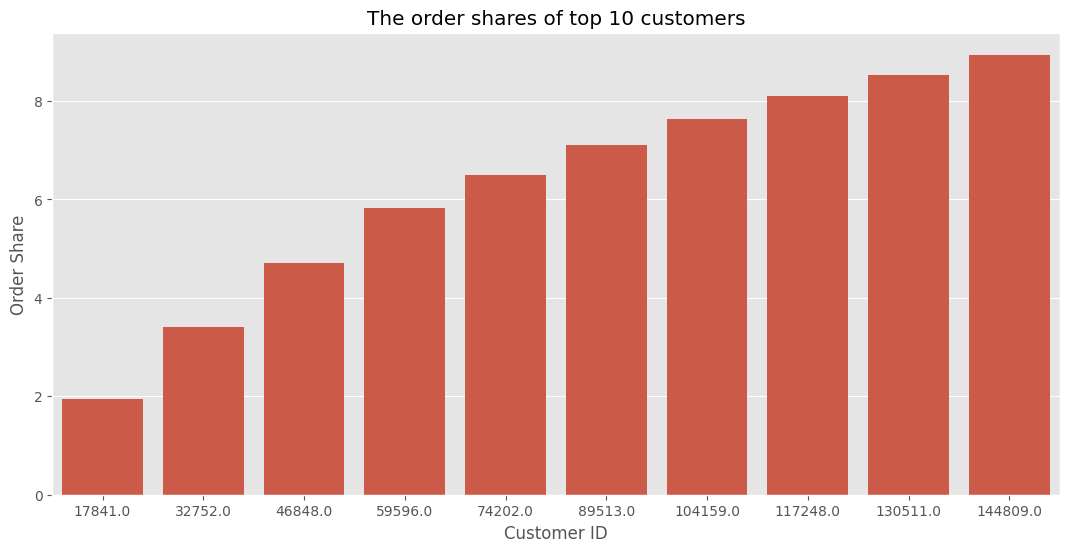

In [ ]:
# plot the top 10 customer's order share
plt.figure(figsize=(13,6))
sns.barplot(x='Customer ID', y='Order Share', data=share_df[:10].cumsum())
plt.title('The order shares of top 10 customers')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

* We can observe that only 10 customers out of 4338 unique customers are responsible for approx 9% of the total orders.

* We can infer that these customers might be wholesalers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* The insight that 10 customers contribute to 9% of the total orders suggests they might be wholesalers. This can lead to positive business impact by enabling targeted marketing, personalized offers, and better resource allocation to strengthen relationships with these high-value customers. However, over-relying on this small group could create revenue instability if any customers leave. Additionally, focusing too much on them might neglect other customers, limiting overall market expansion. It’s important to balance efforts between retaining high-value customers and nurturing growth across the broader customer base.

#### Chart - 9

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day,year,month_num,day_num,hour,minute,month,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,20.34


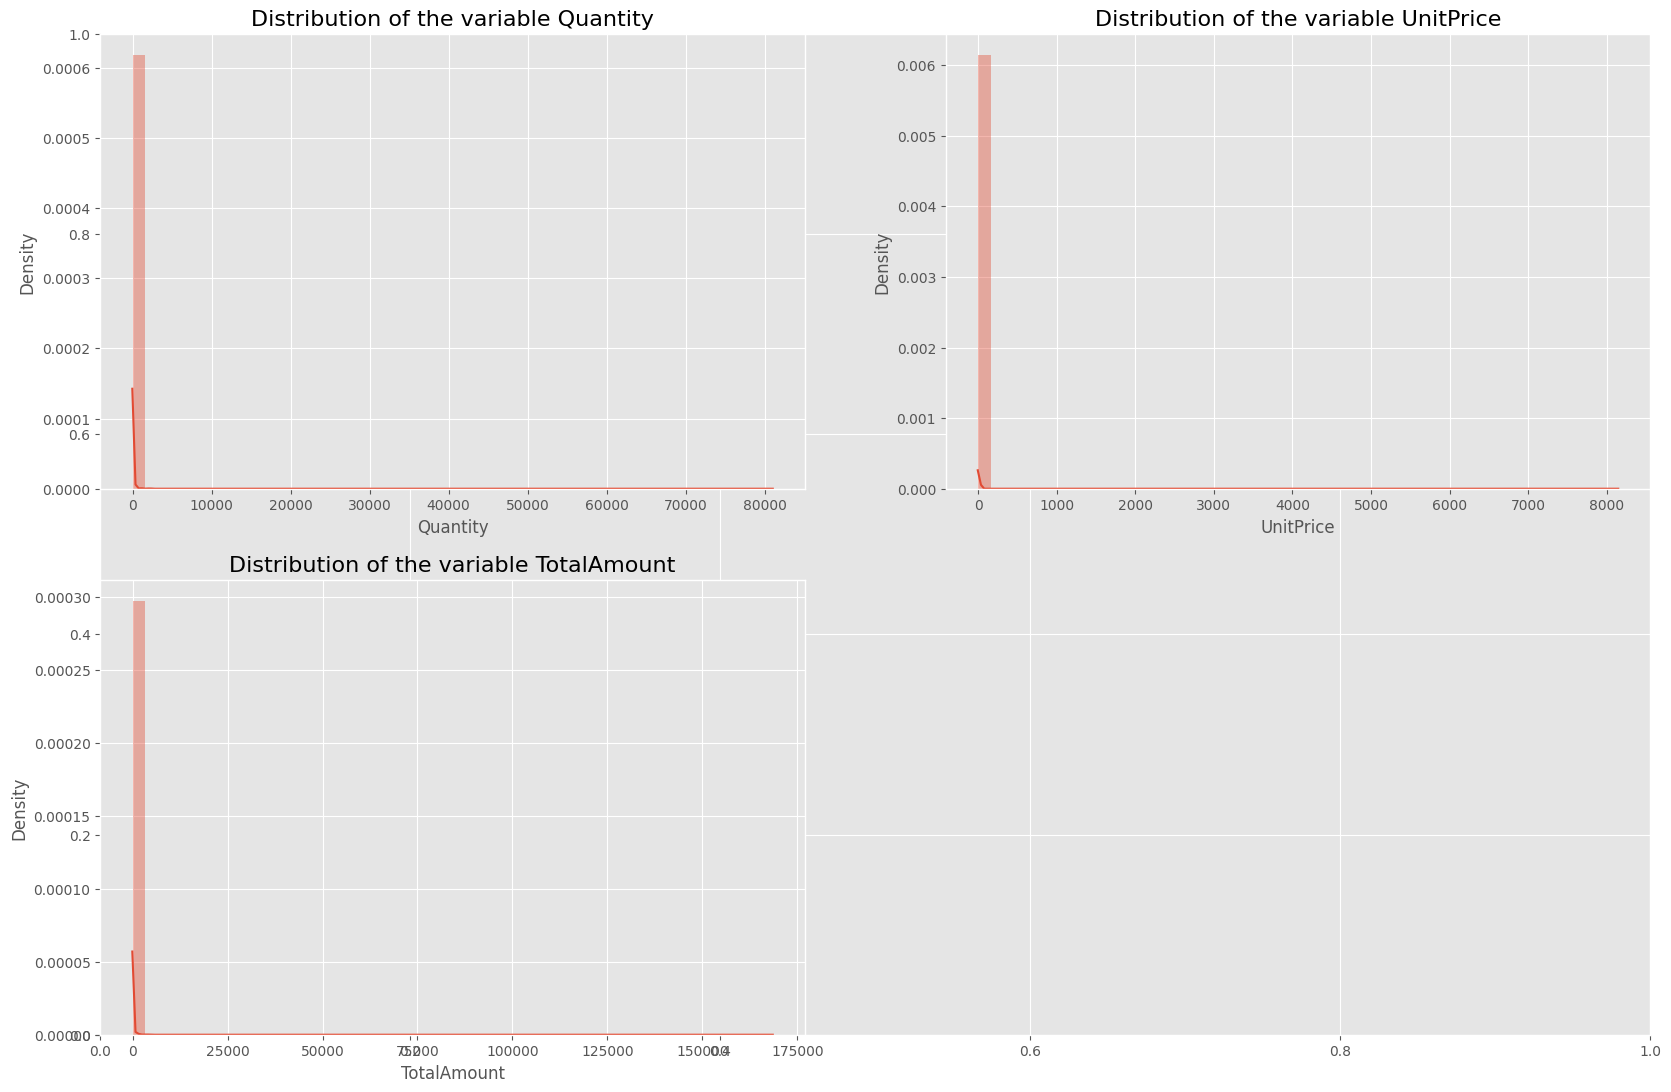

In [ ]:
# Chart - 9 visualization code
# plot the distribution of the numerical features

# Ensuring the TotalAmount column is created
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

num_features = ['Quantity', 'UnitPrice', 'TotalAmount']
count = 1
plt.subplots(figsize=(20,13))
for feature in num_features:
  plt.subplot(2,2,count)
  sns.distplot(df[feature])
  plt.title(f"Distribution of the variable {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1

##### 2. What is/are the insight(s) found from the chart?

* The distribution of all the variables are heavily right skewed.

* We will apply log transformation on these variables to make it less skewed.

#### Chart - 10

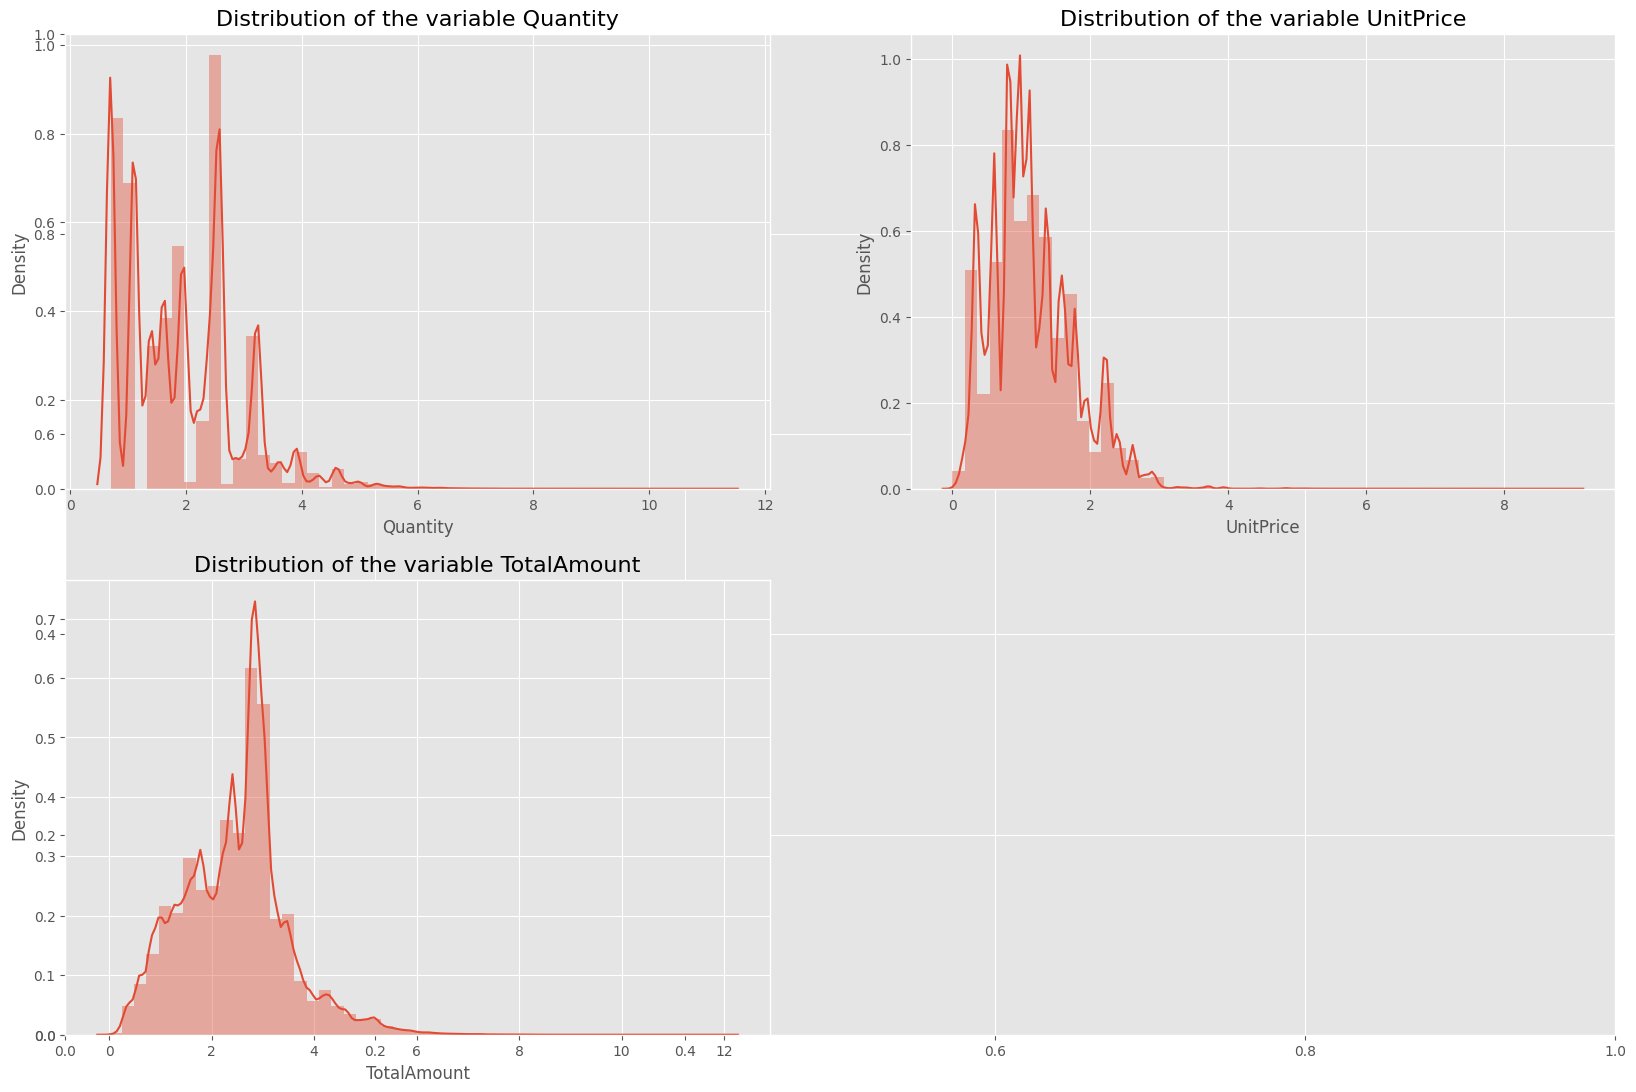

In [ ]:
# Chart - 10 visualization code
# taking a log transformation
count = 1
plt.subplots(figsize=(20,13))
for feature in num_features:
  plt.subplot(2,2,count)
  sns.distplot(np.log1p(df[feature]))
  plt.title(f"Distribution of the variable {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1

##### 2. What is/are the insight(s) found from the chart?

 The variables after log transformation are less skewed than before.

* It isn't a normal distribution but somewhat close to that than before.

#### Chart - 10
 **Which day of the week had the most and the least number of purchases?**

In [ ]:
# number of purchases w.r.t the day of the week
day_df = df['day'].value_counts().reset_index()
day_df.rename(columns={'day': 'Day'}, inplace=True)
day_df.rename(columns={'count': 'Count'}, inplace=True)
day_df

,Day,Count
0,Thursday,79243
1,Wednesday,68040
2,Tuesday,65744
3,Monday,64231
4,Sunday,61212
5,Friday,54222


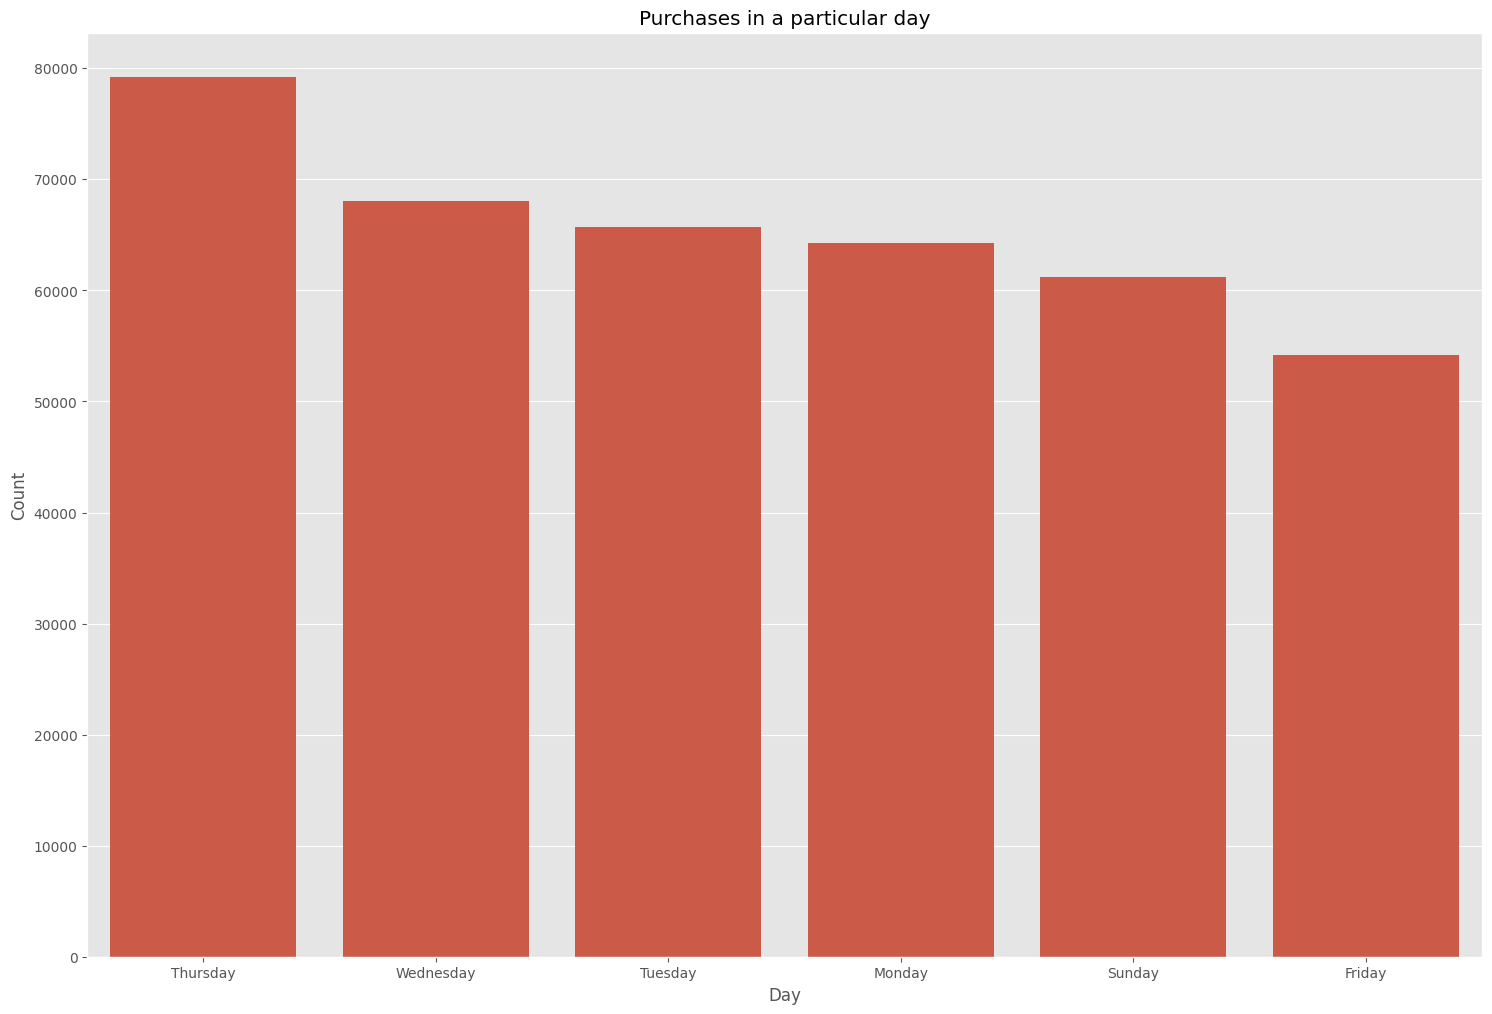

In [ ]:
# plot the number of purchases w.r.t day of the week
plt.figure(figsize=(18,12))
sns.barplot(x ='Day', y='Count', data=day_df)
plt.title('Purchases in a particular day')
plt.show()

* Most of the customers have made a purchase in Thursday followed by Wednesday.

* Friday is the day with least number of purchases made.

#### Chart - 12  **Which month had the most and the least number of purchases?**

In [ ]:
# number of purchases w.r.t month
month_df = df['month'].value_counts().reset_index()
month_df.rename(columns={'month': 'Month'}, inplace=True)
month_df.rename(columns={'count': 'Count'}, inplace=True)
month_df

,Month,Count
0,November,63168
1,October,48793
2,December,42696
3,September,39669
4,May,28073
5,June,26926
6,March,26870
7,August,26790
8,July,26580
9,April,22433


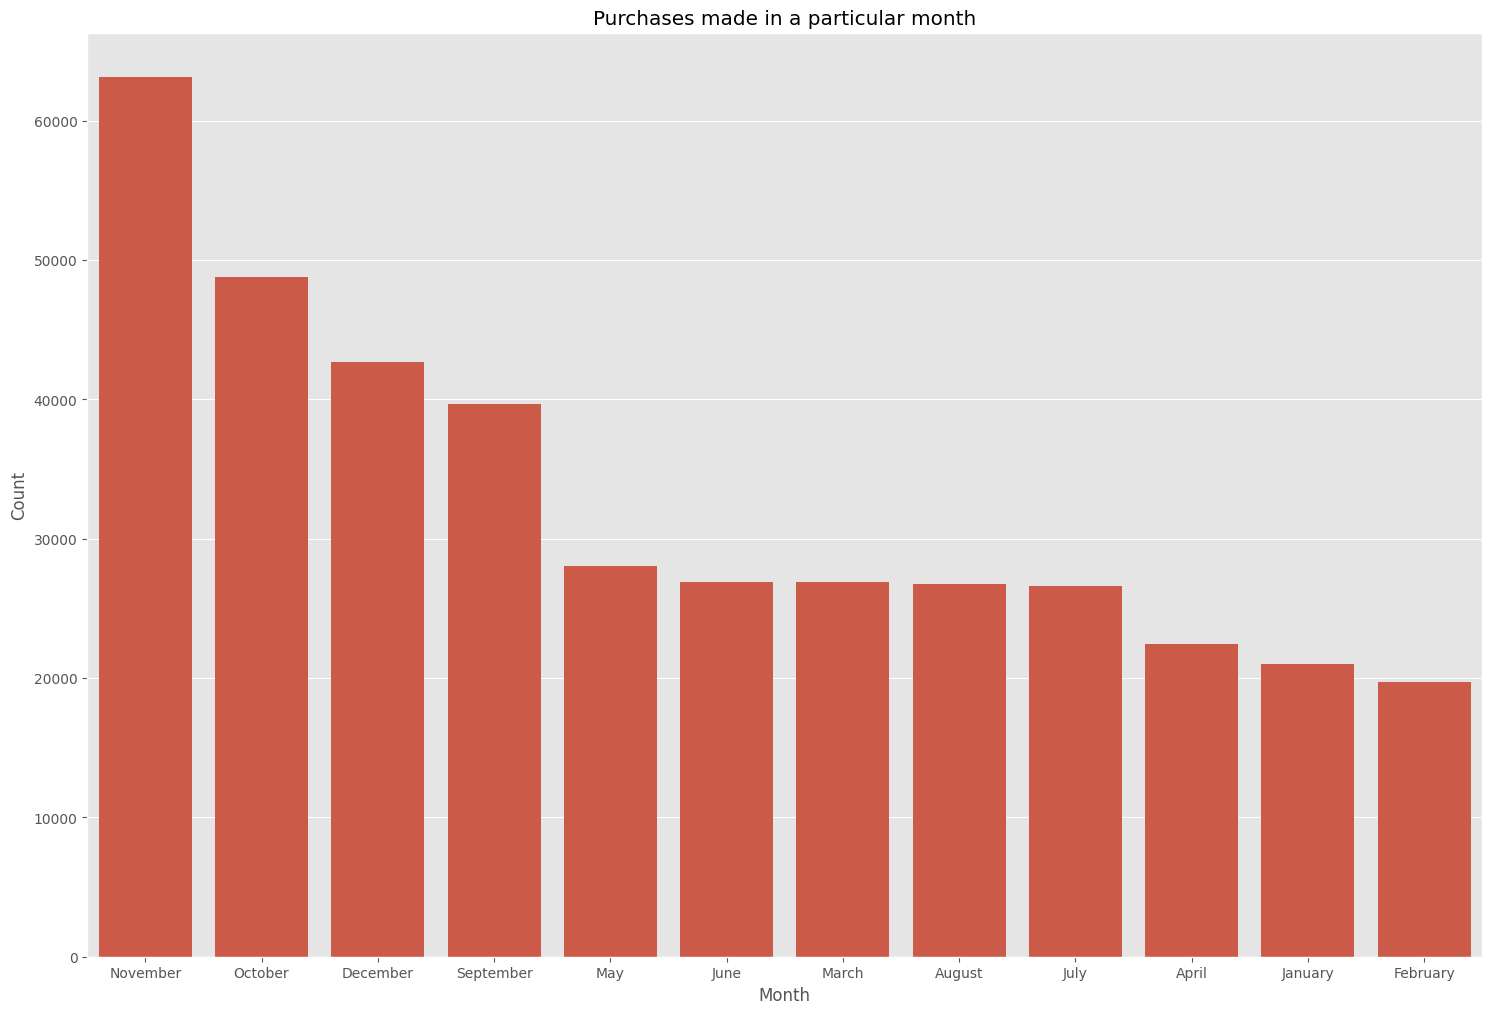

In [ ]:
# plot the number of purchases w.r.t month
plt.figure(figsize=(18,12))
sns.barplot(x='Month', y='Count', data=month_df)
plt.title('Purchases made in a particular month')
plt.show()

* The most number of purchases are made during October to December which is a festive season for many people.

* The least number of purchases are made during the initial months of a year, January and February which is quite obvious because as soon as the festive season ends, purchases or sales will go down.

#### Chart - 13 **Which hour of the day had the most and the least number of purchases?**

In [ ]:
# number of purchases w.r.t hour of the day
hour_df = df['hour'].value_counts().reset_index()
hour_df.rename(columns={'hour': 'Hour'}, inplace=True)
hour_df.rename(columns={'count': 'Count'}, inplace=True)
hour_df

,Hour,Count
0,12,70938
1,13,63019
2,14,53251
3,11,48365
4,15,44790
5,10,37773
6,16,23715
7,9,21927
8,17,12941
9,8,8687


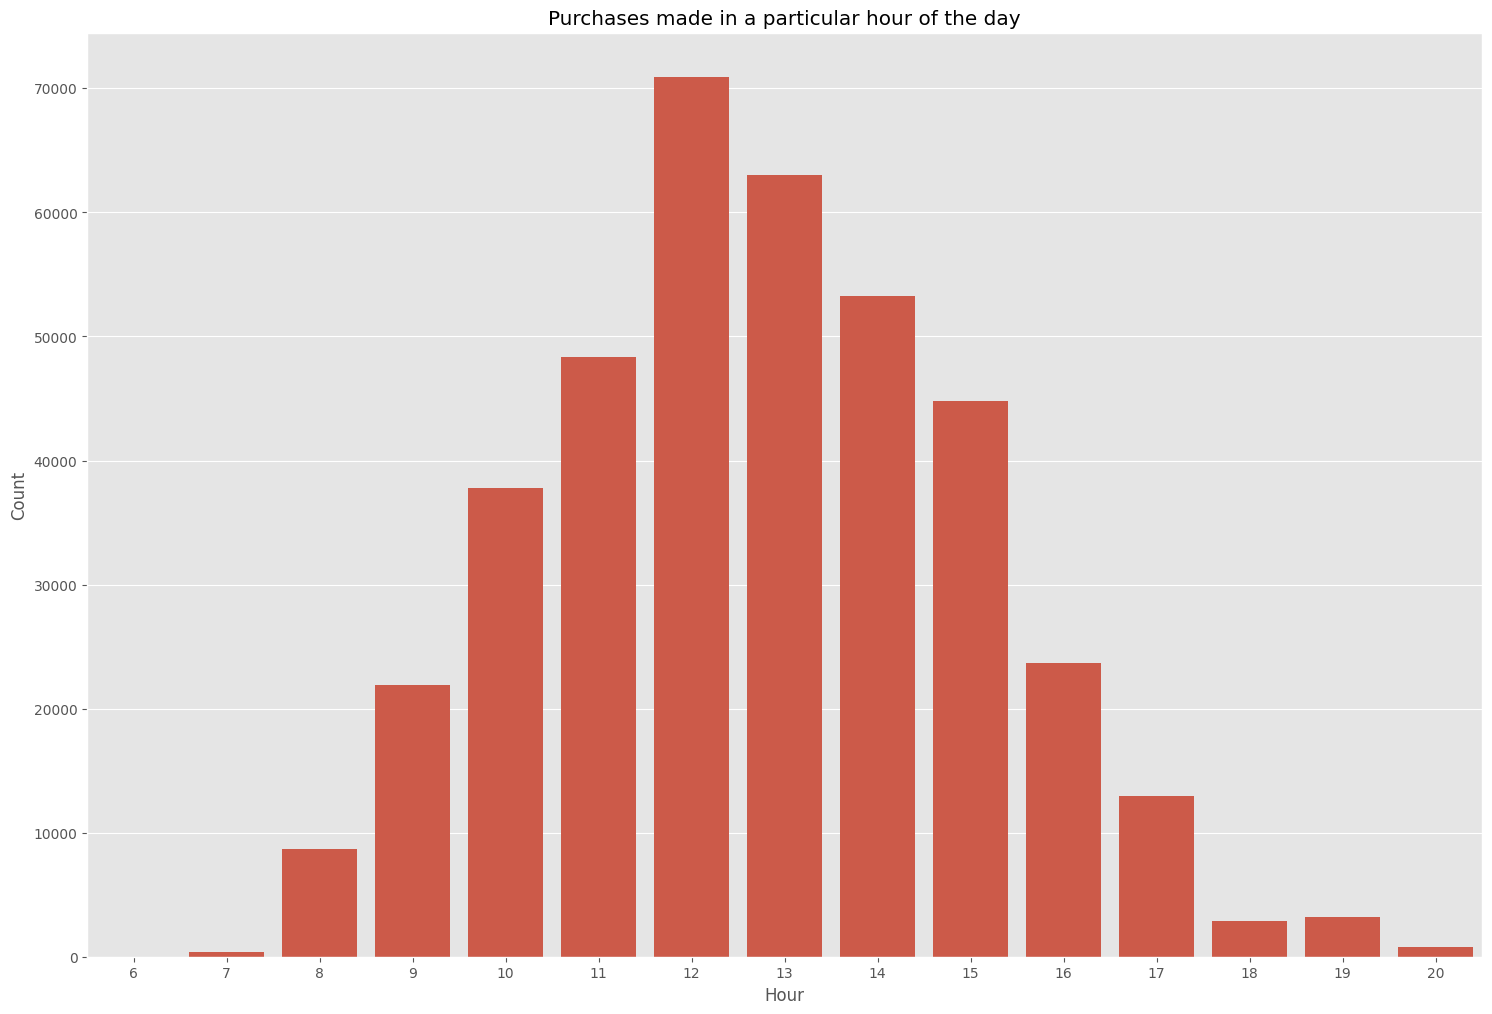

In [ ]:
# plot the number of purchases w.r.t hour of the day
plt.figure(figsize=(18,12))
sns.barplot(x='Hour', y='Count', data=hour_df)
plt.title('Purchases made in a particular hour of the day')
plt.show()

* Most of the purchases are around the afternoon period and a very few number of purchases during morning or evening.

* We can bucket this hour graph into morning, afternoon and evening buckets.

In [ ]:
# grouping the time into 3 buckets
def time_day(time):
  if (time >= 6 and time <= 11):
    return 'Morning'
  elif (time >= 12 and time <= 17):
    return 'Afternoon'
  else:
    return 'Evening'

# applying the function into the column
df['time_day'] = df['hour'].apply(time_day)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day,year,month_num,day_num,hour,minute,month,TotalAmount,time_day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,15.30,Morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,20.34,Morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,22.00,Morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,20.34,Morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,20.34,Morning


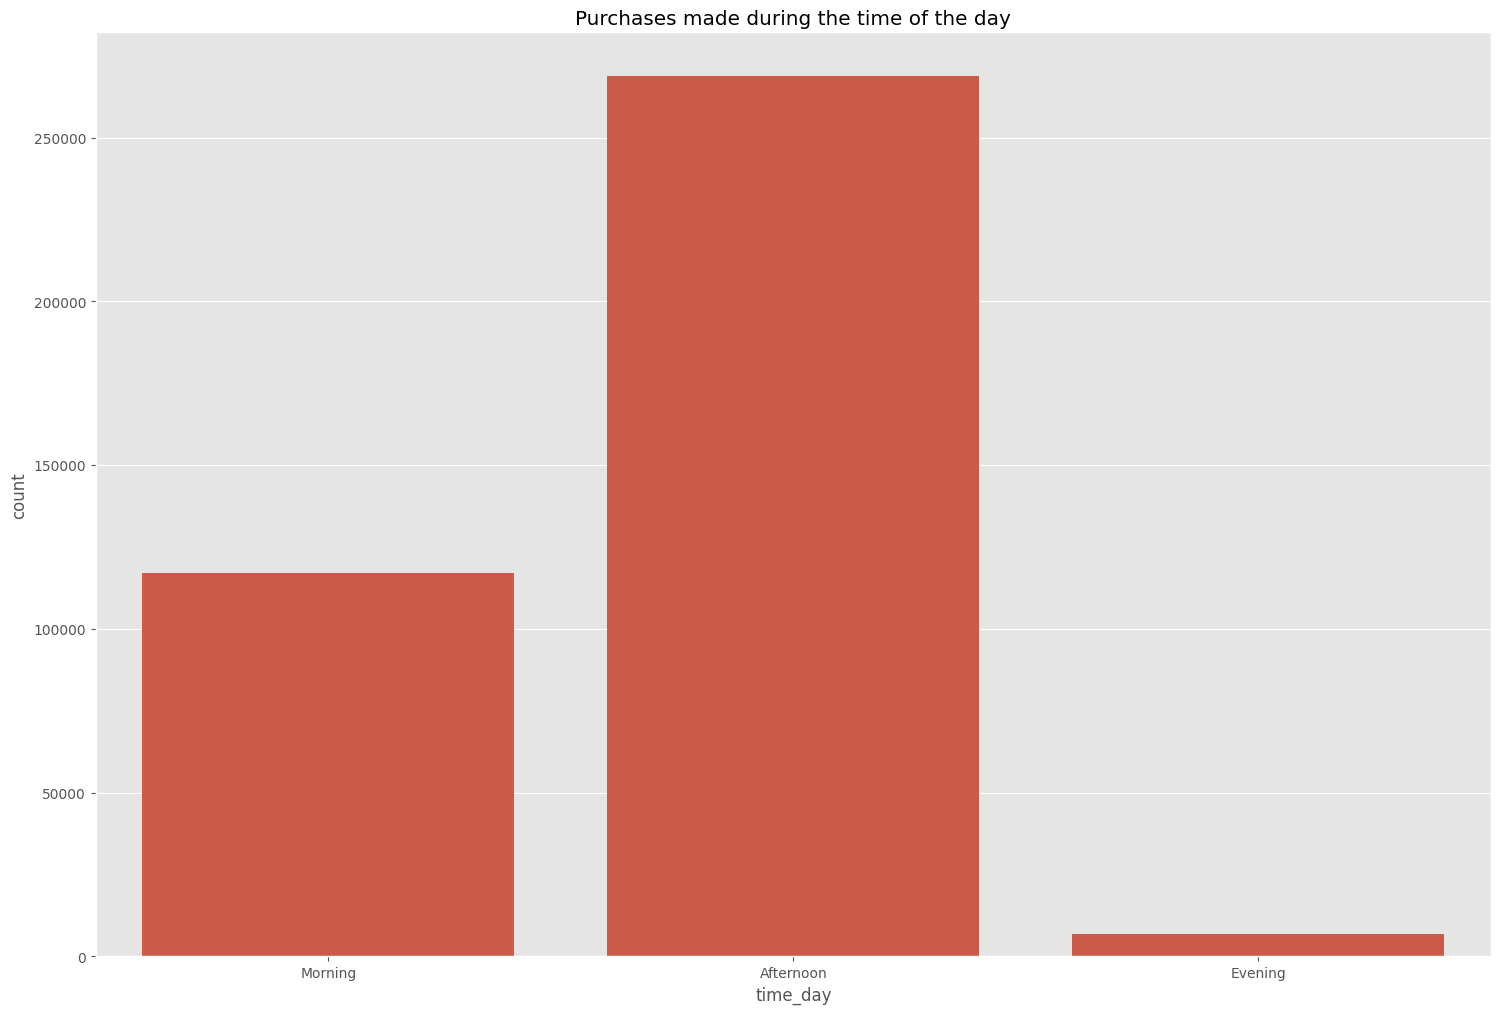

In [ ]:
# plotting the number of purchases w.r.t hour again
plt.figure(figsize=(18,12))
sns.countplot(x='time_day', data=df)
plt.title('Purchases made during the time of the day')
plt.show()

* Now, it is more clear that most of the purchases has occurred during the Afternoon followed by Morning and the least number of purchases during Evening.

#***RFM Model (Recency, Frequency and Monetary)***

#### Recency, frequency, monetary value is a marketing analysis tool used to identify a company's or an organization's best customers by measuring and analyzing spending habits.

#### The RFM model is based on three quantitative factors:

1. Recency: How recently a customer has made a purchase
2. Frequency: How often a customer makes a purchase
3. Monetary Value: How much money a customer spends on purchases


### **Performing RFM Segmentation and RFM Analysis, step by step:**

#### **Step 1:**
The first step in building an RFM model is to assign Recency, Frequency and Monetary values to each customer.

### **Step 2:**
The second step is to divide the customer list into tiered groups for each of the three dimensions (R, F and M), using Excel or another tool.

**Calculating RFM scores**

The number is typically 3 or 5. If you decide to code each RFM attribute into 3 categories, you'll end up with 27 different coding combinations ranging from a high of 333 to a low of 111. Generally speaking, the higher the RFM score, the more valuable the customer.

##**Recency = Latest Date - Last Inovice Data**

In [ ]:
# Creatimg  a new feature Date in the datset
df['Date'] = df['InvoiceDate'].dt.date
# Group the dataset by customerID and find the most recent purchase date for each customer
recency_df = df.groupby('CustomerID')['Date'].max().reset_index().rename(columns = {'Date': 'LastPurchaseDate'})

# Display the first few rows of the dataframe to inspect the results
recency_df.head()

,CustomerID,LastPurchaseDate
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02


In [ ]:
# Get the latest date in the dataset
latest_date = df['Date'].max()

print(latest_date)


2011-12-09


In [ ]:
# Calculate the recency of each customer's last purchase
recency_df['Recency'] = recency_df['LastPurchaseDate'].apply(lambda x : (latest_date - x).days)

# Display the first 10 rows of the recency dataframe
recency_df.head(10)

,CustomerID,LastPurchaseDate,Recency
0,12346.0,2011-01-18,325
1,12347.0,2011-12-07,2
2,12348.0,2011-09-25,75
3,12349.0,2011-11-21,18
4,12350.0,2011-02-02,310
5,12352.0,2011-11-03,36
6,12353.0,2011-05-19,204
7,12354.0,2011-04-21,232
8,12355.0,2011-05-09,214
9,12356.0,2011-11-17,22


In [ ]:
# Dropping the 'LastPurchaseDate' column from the dataframe
recency_df.drop('LastPurchaseDate', axis = 1, inplace = True)

recency_df.head()

,CustomerID,Recency
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310


**Now we have the recency attribute created e.g: Customer with ID = 12346 did his/her last purshace 325 days ago.**

## **Frequency**

In [ ]:
# Grouping the data by customer ID and count the number of invoices for each customer
frequency_df = df.groupby('CustomerID')['InvoiceNo'].count().reset_index().rename(columns = {'InvoiceNo': 'Frequency'})

# Displaying the first 10 rows of the dataframe to inspect the results
frequency_df.head(10)

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
5,12352.0,85
6,12353.0,4
7,12354.0,58
8,12355.0,13
9,12356.0,59


## **Monetary Value**

In [ ]:
# Grouping the data by customer ID and sum the total amount spent by each customer
monetary_df = df.groupby('CustomerID')['TotalAmount'].sum().reset_index().rename(columns = {'TotalAmount': 'Monetary'})

monetary_df.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


**The RFM dataframe combines recency, frequency, and monetary value information for each customer to provide a comprehensive overview of their behavior and spending habits.**

In [ ]:
# Merging the recency and frequency dataframes on the customer ID column

tem_df = recency_df.merge(frequency_df, on = 'CustomerID')

tem_df.head()

,CustomerID,Recency,Frequency
0,12346.0,325,1
1,12347.0,2,182
2,12348.0,75,31
3,12349.0,18,73
4,12350.0,310,17


In [ ]:
# Merging the monetary value and tem_df dataframe on the customer ID column
rfm_df = tem_df.merge(monetary_df, on = 'CustomerID')

rfm_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


In [ ]:
#Descriptive Statistics (Recency)
rfm_df.Recency.describe()

,Recency
count,4338.000000
mean,92.059474
std,100.012264
min,0.000000
25%,17.000000
50%,50.000000
75%,141.750000
max,373.000000


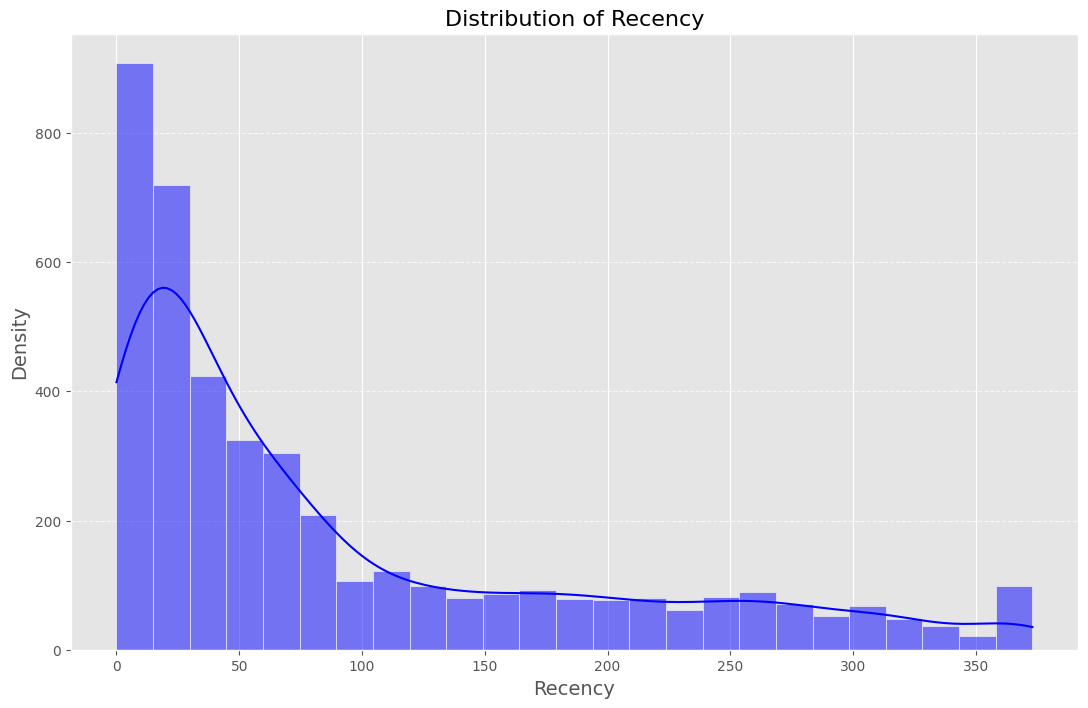

In [ ]:
#Recency distribution plot
import seaborn as sns
import matplotlib.pyplot as plt

# Data
x = rfm_df['Recency']

# Plot the distribution
plt.figure(figsize=(13, 8))
sns.histplot(x, kde=True, color='blue')
plt.title('Distribution of Recency', fontsize=16)
plt.xlabel('Recency', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)  #Adding grid for better readability
plt.show()


In [ ]:
#Descriptive Statistics (Frequency)
rfm_df.Frequency.describe()

,Frequency
count,4338.000000
mean,90.523744
std,225.506968
min,1.000000
25%,17.000000
50%,41.000000
75%,98.000000
max,7676.000000


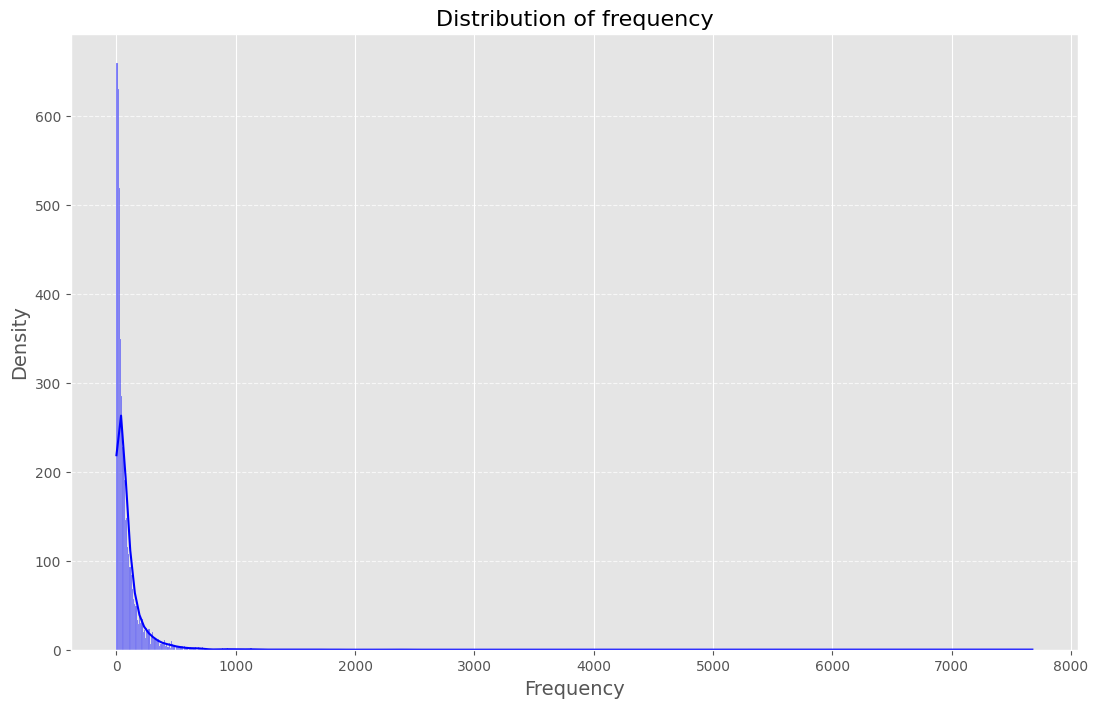

In [ ]:
#Frequency distribution plot
#taking observations which have frequency less than 1000
import seaborn as sns
import matplotlib.pyplot as plt

# Data
x = rfm_df['Frequency']

# Plot the distribution
plt.figure(figsize=(13, 8))
sns.histplot(x, kde=True, color='blue')
plt.title('Distribution of frequency', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)  #Adding grid for better readability
plt.show()


In [ ]:
#Descriptive Statistics (Monetary)
rfm_df.Monetary.describe()

,Monetary
count,4338.000000
mean,2048.688081
std,8985.230220
min,3.750000
25%,306.482500
50%,668.570000
75%,1660.597500
max,280206.020000


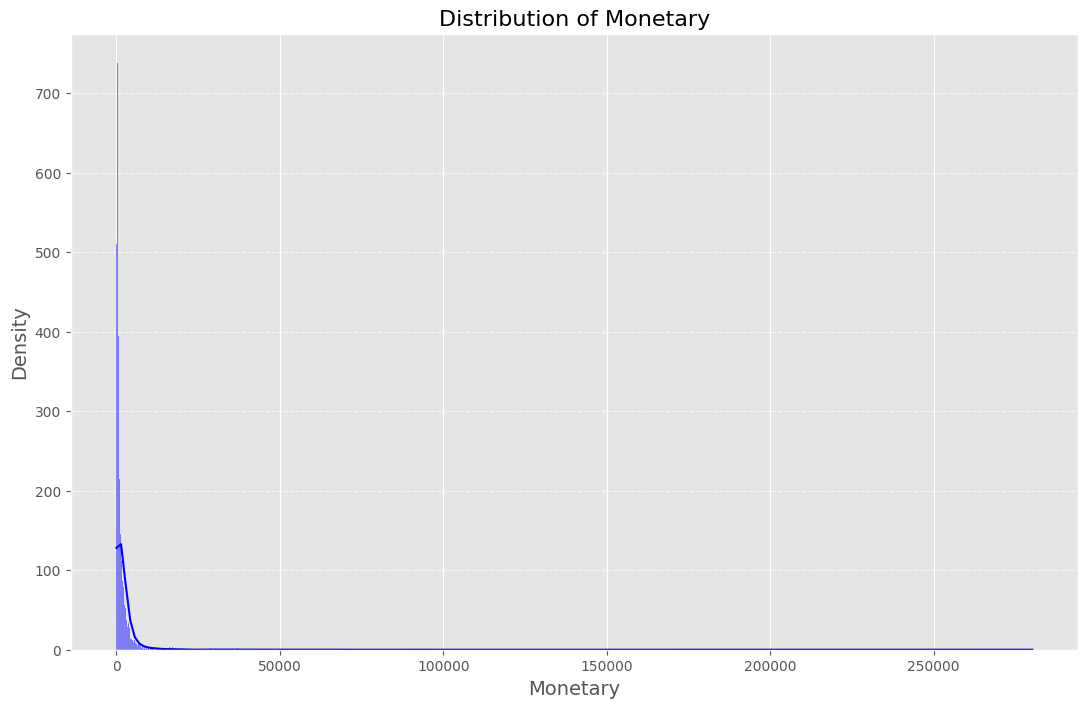

In [ ]:
#Monetary distribution plot
import seaborn as sns
import matplotlib.pyplot as plt

# Data
x = rfm_df['Monetary']

# Plot the distribution
plt.figure(figsize=(13, 8))
sns.histplot(x, kde=True, color='blue')
plt.title('Distribution of Monetary', fontsize=16)
plt.xlabel('Monetary', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## **Customer segments with RFM Model**

The simplest way to create customers segments from RFM Model is to use **Quantiles**. We assign a score from 1 to 4 to Recency, Frequency and Monetary. Four is the best/highest value, and one is the lowest/worst value. A final RFM score is calculated simply by combining individual RFM score numbers.

Note: Quintiles (score from 1-5) offer better granularity, in case the business needs that but it will be more challenging to create segments since we will have 555 possible combinations. So, we will use quartiles.

In [ ]:
# Calculate quantiles for the RFM dataframe
quantiles = rfm_df[['Recency', 'Frequency', 'Monetary']].quantile(q = [0.25, 0.5, 0.75])

quantiles

,Recency,Frequency,Monetary
0.25,17.00,17.0,306.4825
0.50,50.00,41.0,668.5700
0.75,141.75,98.0,1660.5975


In [ ]:
# Convert quantile values to dictionary
quantiles_dict = quantiles.transpose().to_dict()

quantiles_dict

{0.25: {'Recency': 17.0, 'Frequency': 17.0, 'Monetary': 306.48249999999996},
 0.5: {'Recency': 50.0, 'Frequency': 41.0, 'Monetary': 668.57},
 0.75: {'Recency': 141.75, 'Frequency': 98.0, 'Monetary': 1660.5974999999999}}

###  **RFM Table & Score**

In [ ]:
# Creating RecencyScore column by dividing Recency into quartiles and assigning respective quantile labels
rfm_df['RecencyScore'] = pd.qcut(rfm_df['Recency'], q = [0, 0.25, 0.5, 0.75, 1], labels = list(range(4, 0, -1)))

# Creating FrequencyScore column by dividing Frequency into quartiles and assigning respective quantile labels
rfm_df['FrequencyScore'] = pd.qcut(rfm_df['Frequency'], q=[0, 0.25, 0.5, 0.75, 1], labels=list(range(1, 5)))

# Creating MonetaryScore column by dividing MonetaryValue into quartiles and assigning respective quantile labels
rfm_df['MonetaryScore'] = pd.qcut(rfm_df['Monetary'], q=[0, 0.25, 0.5, 0.75, 1], labels=list(range(1, 5)))

In [ ]:
# Show first 5 rows of the rfm_df dataframe
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
0,12346.0,325,1,77183.60,1,1,4
1,12347.0,2,182,4310.00,4,4,4
2,12348.0,75,31,1797.24,2,2,4
3,12349.0,18,73,1757.55,3,3,4
4,12350.0,310,17,334.40,1,1,2


In [ ]:
# Concatenating the RecencyScore, FrequencyScore, and MonetaryScore columns into one RFMScore column
rfm_df['RFMScore'] = rfm_df['RecencyScore'].astype(str) + rfm_df['FrequencyScore'].astype(str) + rfm_df['MonetaryScore'].astype(str)

rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFMScore
0,12346.0,325,1,77183.60,1,1,4,114
1,12347.0,2,182,4310.00,4,4,4,444
2,12348.0,75,31,1797.24,2,2,4,224
3,12349.0,18,73,1757.55,3,3,4,334
4,12350.0,310,17,334.40,1,1,2,112


**Interpretation:**
- Best RecencyScore = 4 (most recently purchase)
- Best FrequencyScore = 4 (most frequently purchase)
- Best MonetaryScore = 4 (who spent the most)
- If the RFMScore of any customer is 444. His Recency is good, frequency is more and Monetary is more. So, he is the best customer.
- If the RFMScore of any customer is 111. His Recency is low, frequency is low and Monetary is low. So, he is the churning customer.
- If the RFMScore of any customer is 144. He purchased a long time ago but buys frequently and spends more and so on.
- Like this we can come up with number of segments for all combinations of RecencyScore, FrequencyScore and MonetaryScore based on our usecase.
- Higher the RFMScore, more valuable the customer is.

In [ ]:
# Sorting the dataframe by MonetaryValue in descending order and reset the index
rfm_df2 = rfm_df[rfm_df['RFMScore'] == '444'].sort_values('Monetary', ascending = False)

In [ ]:
rfm_df2.head(10)

,CustomerID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFMScore
1689,14646.0,1,2076,280206.02,4,4,4,444
4201,18102.0,0,431,259657.30,4,4,4,444
3728,17450.0,8,336,194390.79,4,4,4,444
1879,14911.0,1,5670,143711.17,4,4,4,444
1333,14156.0,9,1395,117210.08,4,4,4,444
3771,17511.0,2,963,91062.38,4,4,4,444
3176,16684.0,4,277,66653.56,4,4,4,444
1289,14096.0,4,5111,65164.79,4,4,4,444
996,13694.0,3,568,65039.62,4,4,4,444
2176,15311.0,0,2366,60632.75,4,4,4,444


####**Categorising customer or making customer segmentation based on RFMScore**

In [ ]:
print('Best Customer', len(rfm_df[rfm_df['RFMScore'] == '444']))
print('Loyal Customers: ',len(rfm_df[rfm_df['FrequencyScore'] == 4]))
print("Big Spenders: ",len(rfm_df[rfm_df['MonetaryScore' ]== 4]))
print('Almost Lost: ', len(rfm_df[rfm_df['RFMScore'] =='244']))
print('Lost Customers: ',len(rfm_df[rfm_df['RFMScore'] == '144']))
print('Lost Cheap Customers: ',len(rfm_df[rfm_df['RFMScore'] == '111']))

Best Customer 443
Loyal Customers:  1080
Big Spenders:  1085
Almost Lost:  105
Lost Customers:  22
Lost Cheap Customers:  381


**With the segmentation of our customers based on their RFM scores, we can now tailor our marketing strategies to each segment effectively.**

* Best Customers (443): These are our top-tier, highly engaged customers. We can reward their loyalty through exclusive perks like early access to new products, premium discounts, or invitations to VIP events. Leveraging their positive engagement, we can also encourage them to participate in referral programs, turning them into advocates for our brand.

* Loyal Customers (1,080): These customers frequently engage with our brand and make repeat purchases. To deepen their loyalty, we can offer personalized product recommendations, create a points-based reward system, and invite them to provide feedback on new initiatives.

* Big Spenders (1,085): High-value customers deserve tailored experiences. Offering exclusive bundles, personalized service, or premium memberships can help sustain their spending patterns. These customers are ideal candidates for cross-sell and upsell campaigns.

* Almost Lost Customers (105): These customers show declining activity and are at risk of churning. To re-engage them, we can send personalized win-back campaigns, offer limited-time discounts, or share exclusive content to reignite their interest in our brand.

* Lost Customers (22): While challenging to win back, this segment may still respond to special campaigns. We can focus on surveying them to understand why they stopped engaging, and, if feasible, provide irresistible offers to rekindle their interest.

* Lost Cheap Customers (381): These customers contributed minimally to our revenue and are unlikely to return. Instead of allocating significant resources, we can focus on re-engaging those with the potential for higher value and learn from their churn behavior to improve customer retention strategies in other segments.

In [ ]:
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFMScore
0,12346.0,325,1,77183.60,1,1,4,114
1,12347.0,2,182,4310.00,4,4,4,444
2,12348.0,75,31,1797.24,2,2,4,224
3,12349.0,18,73,1757.55,3,3,4,334
4,12350.0,310,17,334.40,1,1,2,112


In [ ]:
# Droping the RFMScore and its components columns from the dataframe
rfm_data = rfm_df.drop(['RecencyScore', 'FrequencyScore', 'MonetaryScore','RFMScore'], axis = 1).set_index('CustomerID')

# Display the first 5 rows
rfm_data.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40


## **Feature Correlations**

In [ ]:
# Calculating the correlation between the variables
rfm_data.corr()

,Recency,Frequency,Monetary
Recency,1.000000,-0.206501,-0.121975
Frequency,-0.206501,1.000000,0.425282
Monetary,-0.121975,0.425282,1.000000


**Correlation Heatmap**

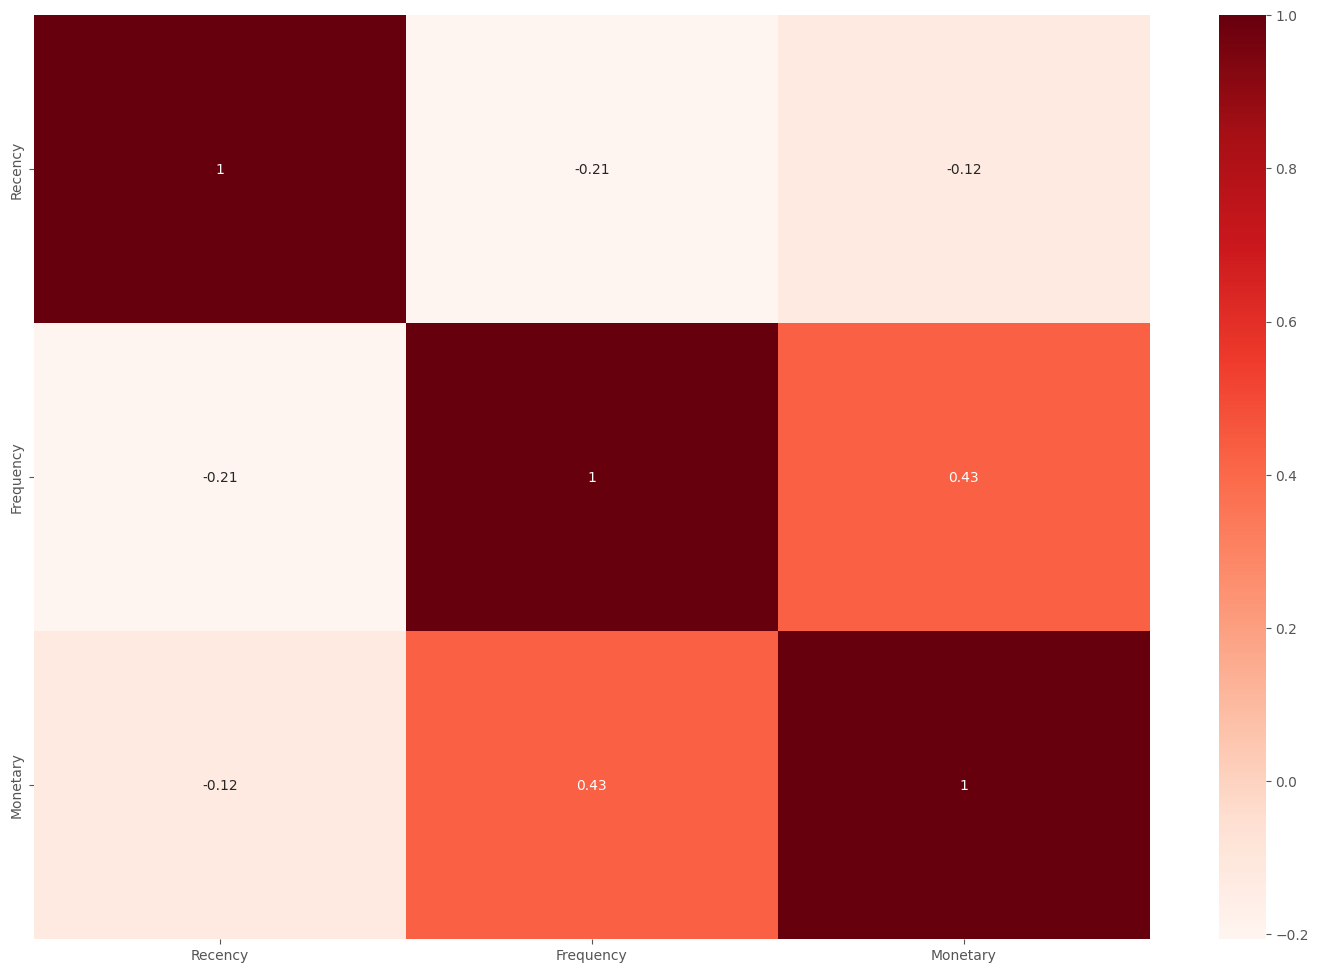

In [ ]:
# Plotting the heatmap of the feature correlations in the dataframe
plt.figure(figsize=(18,12))
sns.heatmap(rfm_data.corr(), annot = True, cmap = 'Reds')
plt.show()

- I picked this chart to show the correlation between different variables.

- The insight is that there is a negative correlation between recency and both frequency and monetary, indicating that customers who have recently made a purchase are less likely to make another purchase. There is also a positive but weak correlation between frequency and monetary.

- The insights can help create a positive business impact by helping businesses better understand customer behaviour and tailor their sales and promotions accordingly.

## **Plot the distribution of Recency, Frequency, and MonetaryValue**

A scatter matrix is a visual representation of the relationships between multiple variables or features in a dataset. It can help identify patterns, trends, and correlations between the variables. It is a useful tool for exploratory data analysis and can help provide insight into the data.

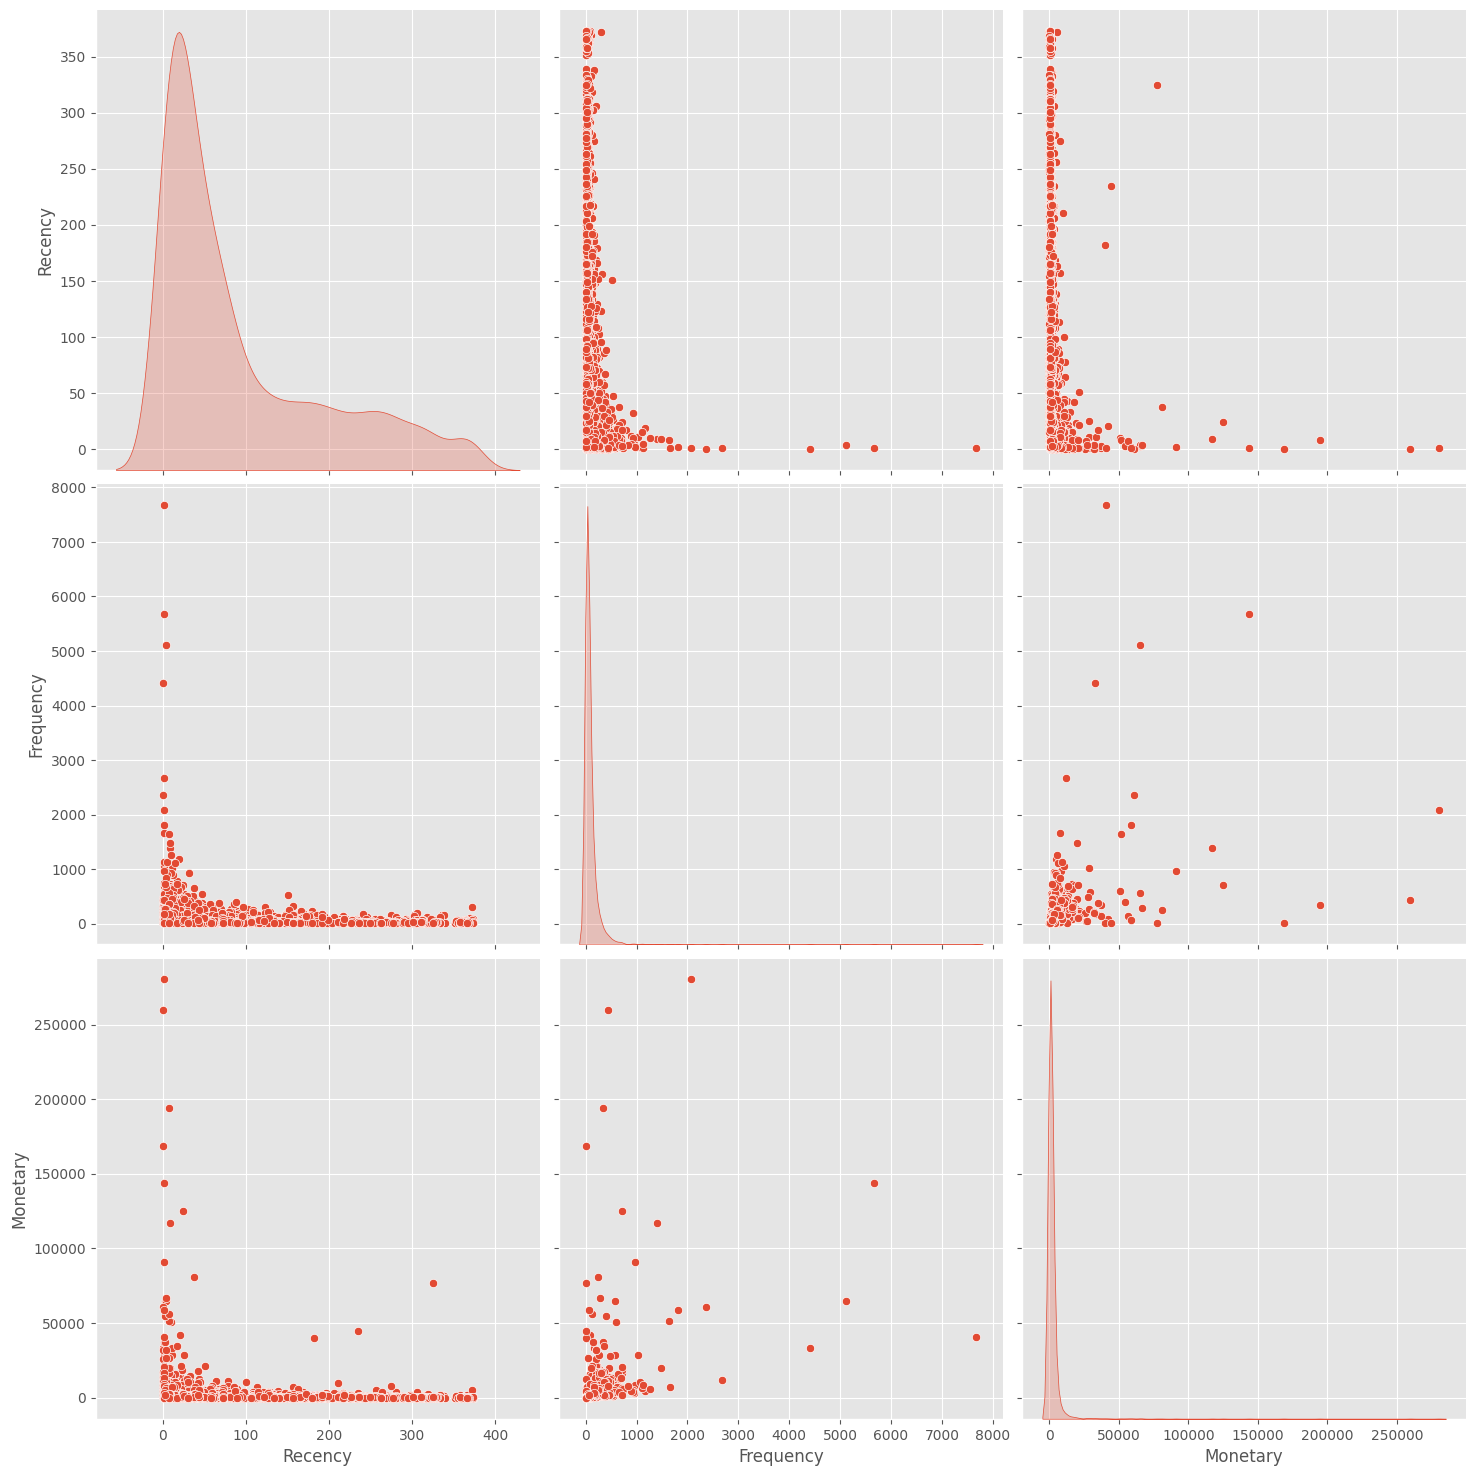

In [ ]:
#Visualizing the distribution of features in the dataset
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot
sns.pairplot(rfm_data, diag_kind='kde', height=5)
plt.show()


- The pairplot with kde diagonal plots was chosen as it is an effective way to visualize the distribution and pairwise relationships between multiple features in a dataset. It allows us to quickly identify any correlations or patterns between variables, making it an excellent choice for visualizing the distribution of features in the dataset.

- We can observe that the distributions of the three variables are skewed. This suggests that normalization is necessary to make the data features normally distributed, as most clustering algorithms require them to be normally distributed.

In [ ]:
#The skew() method is used to measure the asymmetry of the data around the mean.
rfm_data.skew()

,0
Recency,1.245826
Frequency,18.043530
Monetary,19.339368


We can notice that we have a skewed distribution of the 3 variables and there exist outliers.

This indicates how normalization is required to make the data features normally distributed as clustering algorithms require them to be normally distributed.

## **Data Normalization**

For data normalization, logarithmic transformations were applied to the Recency and Monetary features, while a natural logarithmic transformation was applied to the Frequency feature. This was done to reduce the impact of outliers and to scale the data. A small constant value (0.1) was added to the original values before taking the logarithm to avoid taking the logarithm of zero or negative values.



In [ ]:
 #Calculating the logarithmic values of the Recency and Monetary features

# logarithmic value of the Recency feature
rfm_r_log = np.log(rfm_data['Recency'] + 0.1)

# logarithmic value of the Monetary feature
rfm_m_log = np.log(rfm_data['Monetary'] + 0.1)


# calculate the natural log of the 'Frequency' column
rfm_f_log = np.log(rfm_data['Frequency'])

In [ ]:
# Create a DataFrame containing logarithmic values of the Recency, Monetary and Frequency columns

log_data = pd.DataFrame({'Monetary' : rfm_m_log, 'Recency': rfm_r_log, 'Frequency': rfm_f_log})

log_data.head()

,Monetary,Recency,Frequency
CustomerID,,,
12346.0,11.253944,5.784133,0.000000
12347.0,8.368716,0.741937,5.204007
12348.0,7.494063,4.318821,3.433987
12349.0,7.471733,2.895912,4.290459
12350.0,5.812637,5.736895,2.833213


**Plotting the distribution of Recency, Frequency, and MonetaryValue after Data Normalization**

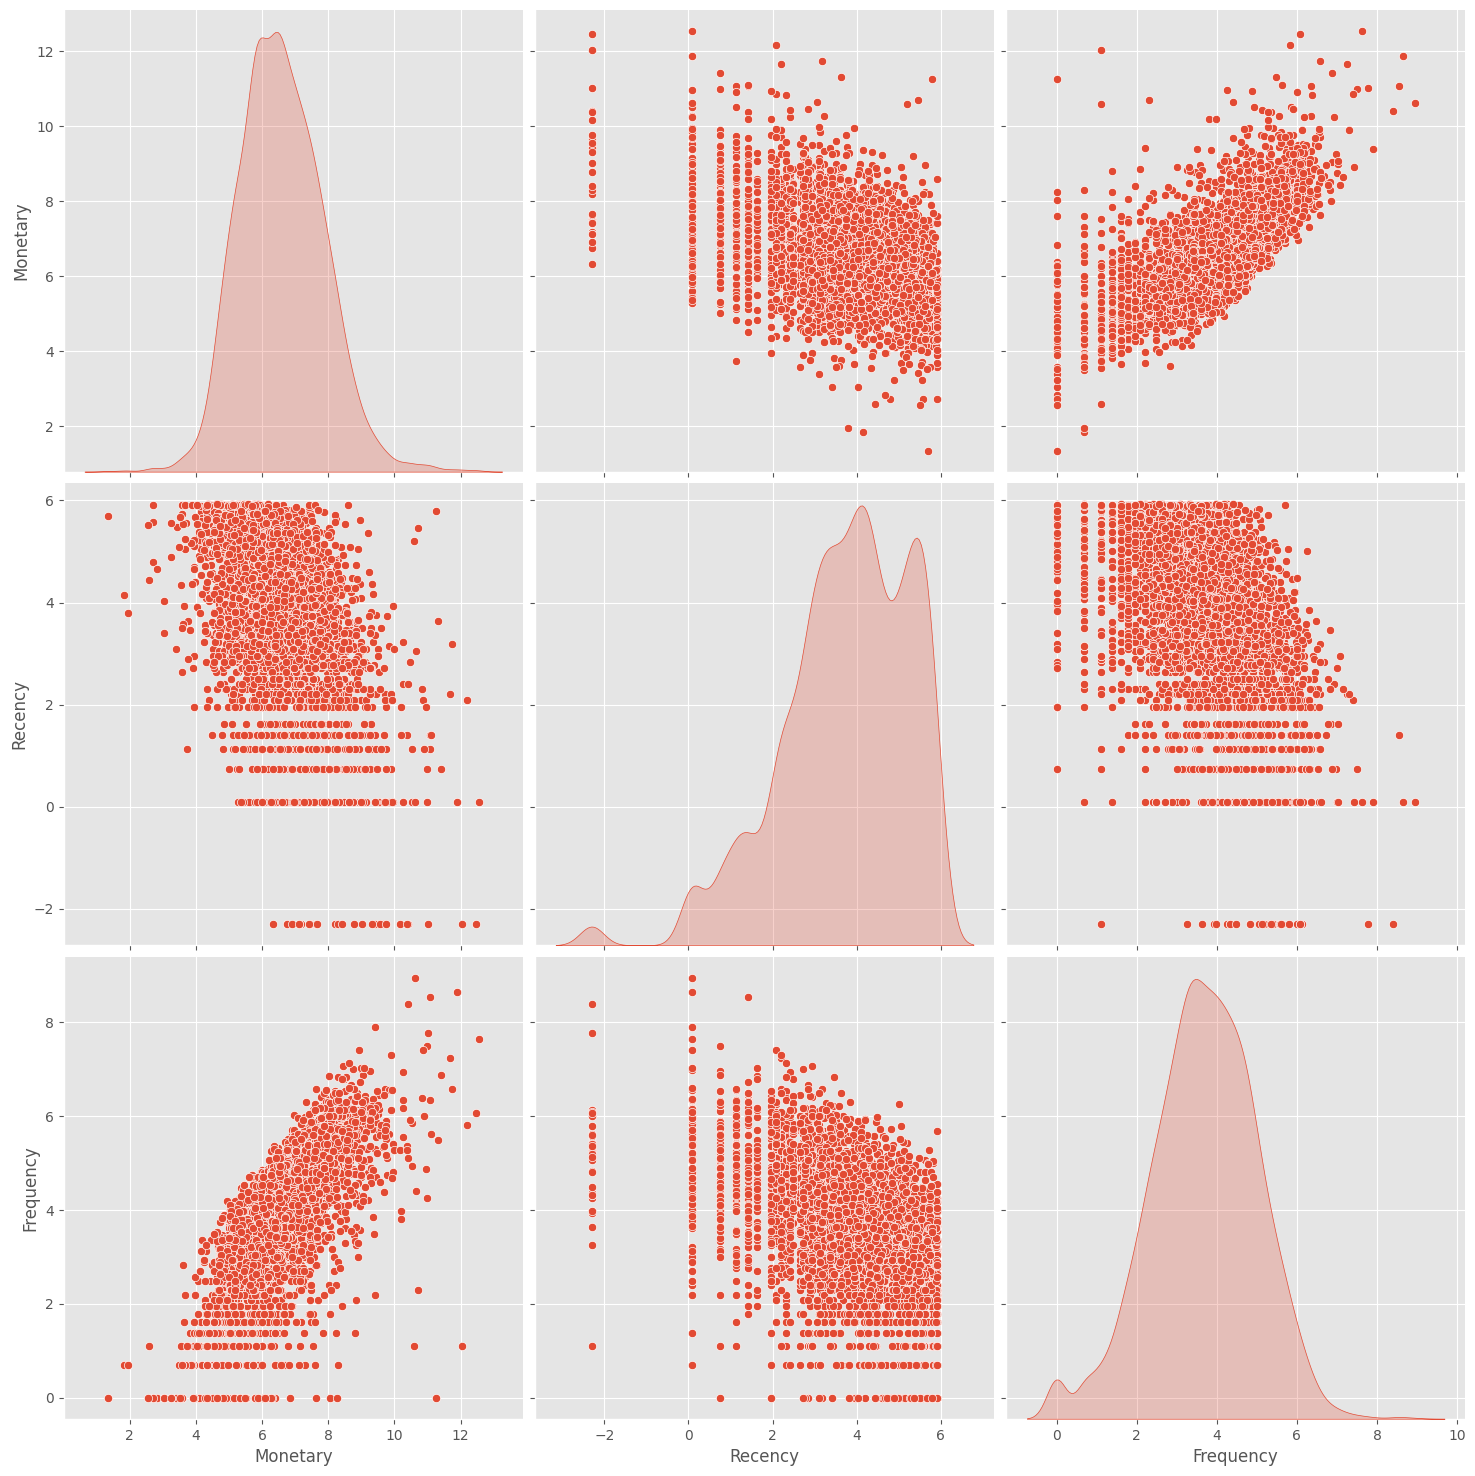

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot
sns.pairplot(log_data, diag_kind='kde', height=5)
plt.show()

The distribution of the Frequency and Monetary features have improved and appear to be more normal, but the distribution of the Recency feature has only improved to some extent and is still not as well-normalized as the other two features.

In [ ]:
# Calculate the skewness of each feature in the data
log_data.skew()

,0
Monetary,0.385332
Recency,-0.869633
Frequency,-0.217968


## **Correlation Heatmap**

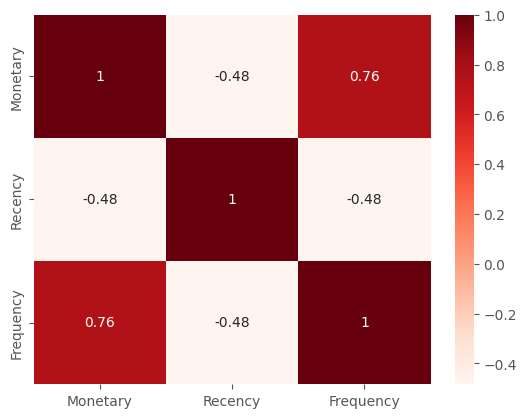

In [ ]:
# Features correlation after log transformation or data normalization
sns.heatmap(log_data.corr(), annot = True, cmap = 'Reds')
plt.show()

The correlation between Monetary and Frequency is now stronger.

In [ ]:
# use the corr method of the data frame to calculate the correlation matrix
log_data.corr()

,Monetary,Recency,Frequency
Monetary,1.000000,-0.483551,0.757412
Recency,-0.483551,1.000000,-0.479347
Frequency,0.757412,-0.479347,1.000000


In [ ]:
# Assign the normalized data to a variable "X"
X = log_data

## **Data Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
# Define the features to use for K-means
features = ['Recency', 'Frequency', 'Monetary']

# Standardize the feature values
scaler = StandardScaler()
X = scaler.fit_transform(log_data[features].values)

I have used Standardization to transform my features in order to ensure that they had a similar scale and distribution. This was important because some machine learning algorithms are sensitive to the scale and distribution of features, and Standardization helps to ensure unbiased results.

# ***ML Model Implementation***

## **K-means Implementation**

- One of the common challenges when working with k-means is the need to specify the number of clusters beforehand. Determining the appropriate number of clusters is not always straightforward, and it can be difficult to deduce from the data alone. To tackle this challenge, a common approach is to try different numbers of clusters and evaluate their corresponding silhouette coefficients.

- The **Silhouette Coefficient** measures the similarity of a data point to its assigned cluster, ranging from -1 (indicating dissimilarity) to 1 (indicating similarity). By computing the silhouette coefficient for each data point, we can gauge how well it aligns with its assigned cluster. A higher silhouette coefficient suggests that the point is more similar to its cluster, indicating better clustering performance.

- Another method that can be used to determine the optimal number of clusters is the **Elbow method**. This technique involves plotting the number of clusters against the corresponding distortion or inertia (the sum of squared distances between each point and its centroid). The plot often resembles an "elbow" shape, and the number of clusters at the "elbow" is considered a good choice for the optimal cluster count.

- It's worth noting that k-means is sensitive to its initializations since they play a crucial role in the quality of the obtained solutions. To address this, a smart initialization technique called **k-means++** is commonly utilized. K-means++ intelligently selects initial cluster centroids, increasing the chances of finding better cluster arrangements. By leveraging k-means++ initialization, we enhance the algorithm's ability to converge to high-quality solutions.

## **K-Means with silhouette_score**

In [ ]:
silhouette_scores = []

# Loop over different values of K
for n_clusters in range(2, 16):
  # Initialize the K-Means model with number of clusters
  kmeans = KMeans(init = 'k-means++', n_clusters = n_clusters)

  # Fit the KMeans Model to the data
  kmeans.fit(X)

  # Predict the cluster labels for each data point
  labels = kmeans.labels_

  # Calculate the Silhouette score
  silhouette = silhouette_score(X, labels)

  # Append the silhouette_score to the array
  silhouette_scores.append(silhouette)

  # Print the silhouette score
  print(f'Silhouette score for {n_clusters} clusters: {silhouette:.3f}')


Silhouette score for 2 clusters: 0.395
Silhouette score for 3 clusters: 0.308
Silhouette score for 4 clusters: 0.252
Silhouette score for 5 clusters: 0.277
Silhouette score for 6 clusters: 0.258
Silhouette score for 7 clusters: 0.267
Silhouette score for 8 clusters: 0.256
Silhouette score for 9 clusters: 0.268
Silhouette score for 10 clusters: 0.251
Silhouette score for 11 clusters: 0.247
Silhouette score for 12 clusters: 0.249
Silhouette score for 13 clusters: 0.254
Silhouette score for 14 clusters: 0.249
Silhouette score for 15 clusters: 0.261


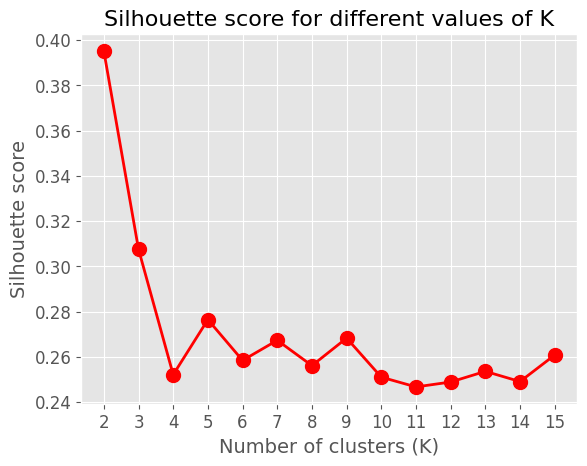

In [ ]:
# Plot the silhouette scores
plt.plot(range(2, 16), silhouette_scores, '-o', color='red', markersize=10, linewidth=2)
plt.xlabel('Number of clusters (K)', fontsize=14)
plt.ylabel('Silhouette score', fontsize=14)
plt.title('Silhouette score for different values of K', fontsize=16)
plt.xticks(range(2, 16), fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**The best silhouette score obtained is when the number of clusters is 2.**

In [ ]:
# Instantiate a KMeans object with 2 clusters
kmeans = KMeans(n_clusters = 2)


# Fit the input data X to the Mean Model
kmeans.fit(X)

# Predict the cluster labels for the input data X using the trained KMeans model
y_kmeans = kmeans.predict(X)

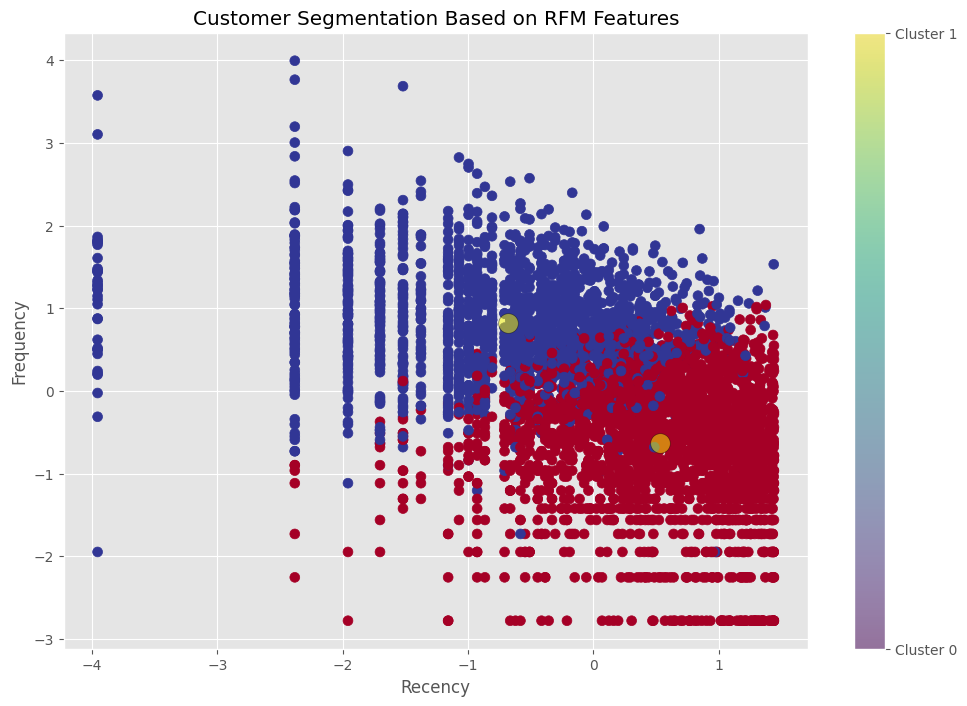

In [ ]:
# Visualization of customer segmentation based On RFM features.
# Set the figure size and title for the scatter plot
plt.figure(figsize=(12,8))
plt.title('Customer Segmentation Based on RFM Features')

# Plot the scatter plot using the first two features of the input data X and the predicted cluster labels y_kmeans
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='RdYlBu')

# Get the cluster centers from the trained KMeans model and plot them as yellow circles with transparency
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5, edgecolor='black')

# Set the x-axis and y-axis labels
plt.xlabel('Recency')
plt.ylabel('Frequency')

# Add a color bar to the plot to show the correspondence between the colors and the cluster labels
color_bar = plt.colorbar()
color_bar.set_ticks(np.unique(y_kmeans))
color_bar.set_ticklabels(['Cluster {}'.format(i) for i in np.unique(y_kmeans)])

# Show the plot
plt.show()

### **K-Means with Elbow method**

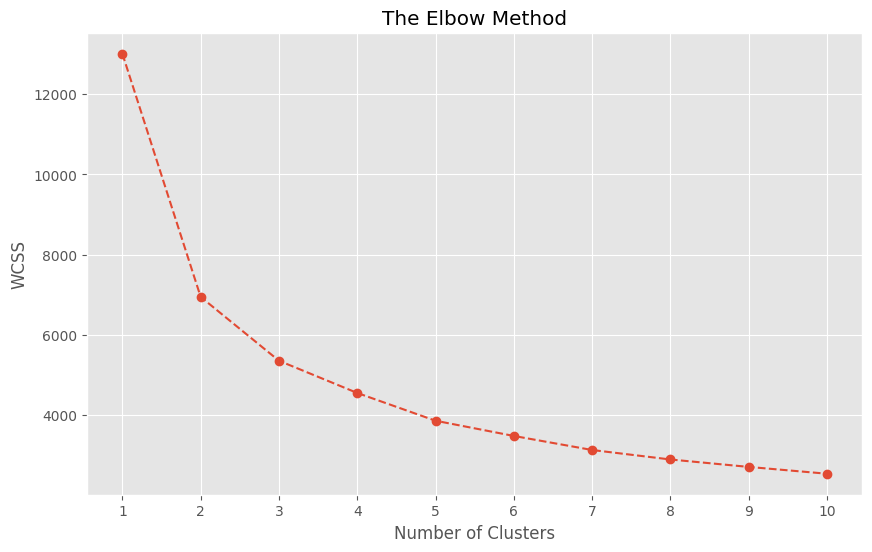

In [ ]:
# Input data X

# Initialize an empty list to store the WCSS values for different number of clusters
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)  # Create a KMeans instance for each number of clusters
    kmeans.fit(X)  # Fit the KMeans model to the input data X
    wcss.append(kmeans.inertia_)  # Append the WCSS value to the list for the current number of clusters

# Plot the WCSS values against the number of clusters
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()


**The Elbow Method plot is commonly used to identify the optimal number of clusters in a K-means clustering algorithm.**

In [ ]:
# Create an instance of the KMeans model with 2 clusters and initialize the centroids using the 'k-means++' method
KMean_clust = KMeans(n_clusters= 2, init= 'k-means++', max_iter= 1000)

# Fit the KMeans model to the data in the X variable
KMean_clust.fit(X)

# Add a new column to the rfm_df dataframe to store the cluster labels for each observation
rfm_df['Cluster'] = KMean_clust.labels_

# Display the first 10 rows of the rfm_df dataframe with the new 'Cluster' column
rfm_df.head(10)

,CustomerID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFMScore,Cluster
0,12346.0,325,1,77183.60,1,1,4,114,0
1,12347.0,2,182,4310.00,4,4,4,444,1
2,12348.0,75,31,1797.24,2,2,4,224,0
3,12349.0,18,73,1757.55,3,3,4,334,1
4,12350.0,310,17,334.40,1,1,2,112,0
5,12352.0,36,85,2506.04,3,3,4,334,1
6,12353.0,204,4,89.00,1,1,1,111,0
7,12354.0,232,58,1079.40,1,3,3,133,0
8,12355.0,214,13,459.40,1,1,2,112,0
9,12356.0,22,59,2811.43,3,3,4,334,1


## **Agglomerative Hierarchial Clustering**

Agglomerative Hierarchical Clustering is a bottom-up approach that merges similar clusters until the desired number of clusters is achieved. It uses a distance/similarity measure between data points and can create a dendrogram to visualize the merging process. It captures hierarchical relationships but can be computationally expensive for large datasets and is not suitable for high-dimensional data.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Create an instance of AgglomerativeClustering with 2 clusters, euclidean metric, and ward linkage
model = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')

# Fit the input data X to the model
model.fit(X)

AgglomerativeClustering()

## Dendogram to find the optimal number of clusters

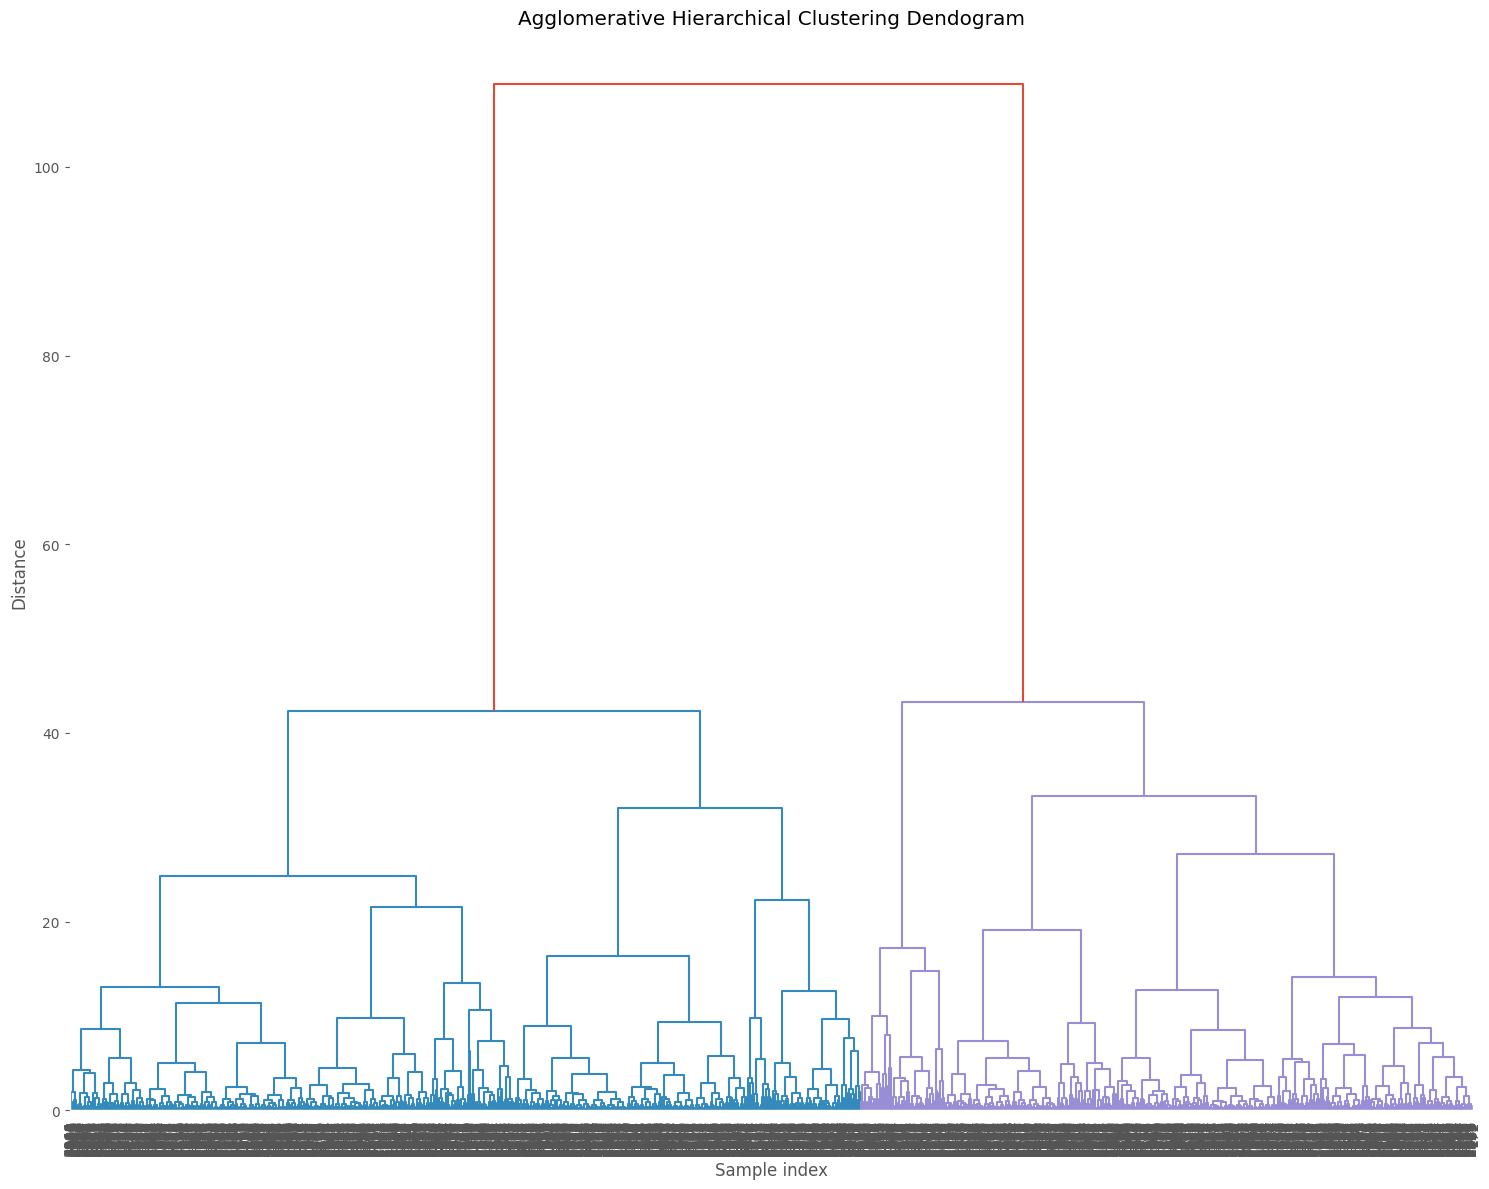

In [ ]:
# Import necessary libraries
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

# Set the figure size and title for the dendrogram plot
plt.figure(figsize=(15, 12))
plt.title('Agglomerative Hierarchical Clustering Dendogram')

# Set the x and y-axis labels for the dendrogram plot
plt.xlabel('Sample index')
plt.ylabel('Distance')

# Create a linkage matrix using the input data X and the ward linkage method
Z = linkage(X, 'ward')

# Plot the dendrogram with specified parameters
dendrogram(Z, leaf_rotation=90.0, p=25, color_threshold=80, leaf_font_size=10, truncate_mode='level')

# Ensure tight layout of the plot
plt.tight_layout()

In [ ]:
# Fitting hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, metric='euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

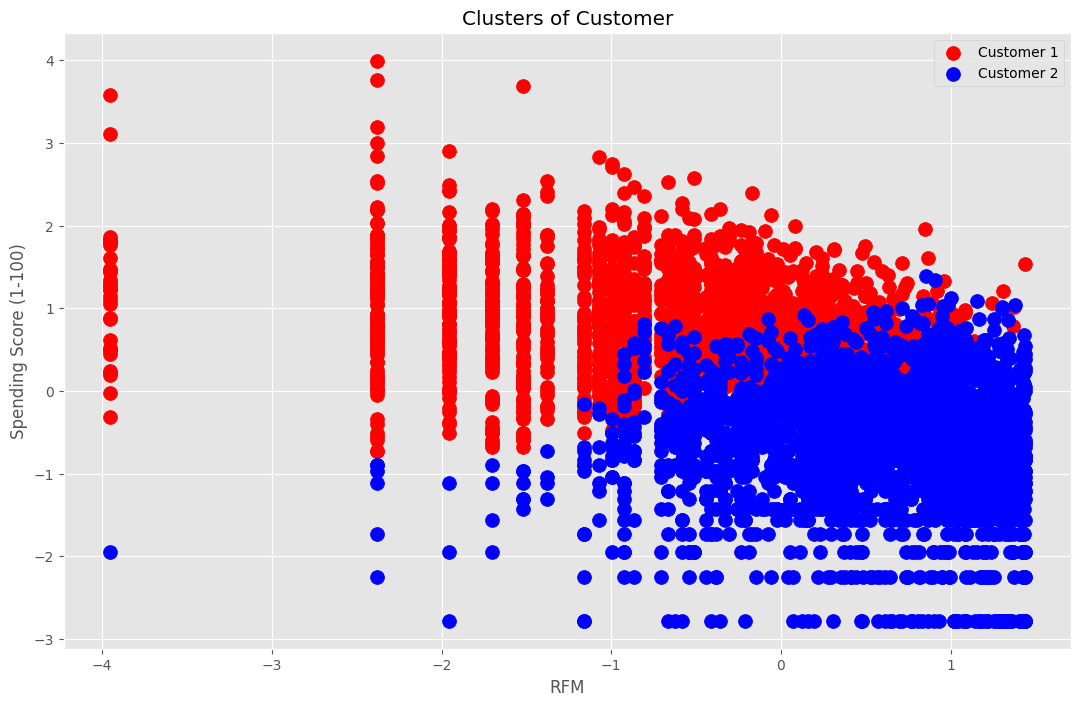

In [ ]:
# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(13,8))
plt.scattZCver(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Customer 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Customer 2')
#plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target')

plt.title('Clusters of Customer')
plt.xlabel('RFM')

plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**

DBSCAN is a density-based clustering algorithm that groups data points based on their density in the feature space. It identifies clusters as dense regions separated by areas of lower density and is robust to noise and outliers. It doesn't require specifying the number of clusters in advance. Its parameters include the radius (Eps) and minimum number of points (MinPts) to form a core point.

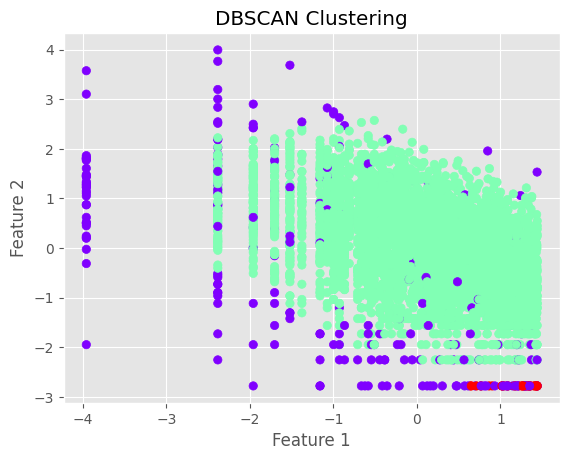

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

# Create and fit the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=15)
dbscan.fit(X)

# Plot the results
plt.scatter(X[:,0], X[:,1], c=dbscan.labels_, cmap='rainbow')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

- The chart used is a scatter plot, which is a suitable choice for visualizing the clustering results of DBSCAN. The x and y axes represent the two features of the dataset, and the points are colored based on their assigned cluster labels.

- The insights gained from the chart include identifying the clusters formed by the DBSCAN algorithm and their density. The points that are closer to each other are assigned to the same cluster, and the outliers or noise points are labeled as -1. By observing the distribution of the points and the density of the clusters, we can understand the structure and characteristics of the data, and potentially find any patterns or anomalies.

- The gained insights can help in creating a positive business impact by identifying groups of similar data points, which can aid in targeting specific segments of customers or optimizing operational processes.

# **Summary Table**

In [ ]:
# Import necessary libraries
from prettytable import PrettyTable

# Initialize the table with specified column names
myTable = PrettyTable(['SL No.', "Model_Name", 'Data', "Optimal_Number_of_cluster"])

# Add rows to the table
myTable.add_row(['1', "K-Means with silhouette_score", "RFM", "2"])
myTable.add_row(['2', "K-Means with Elbow method", "RFM", "2"])
myTable.add_row(['3', "Hierarchical clustering", "RFM", "2"])
myTable.add_row(['4',"DBSCAN ", "RFM", "3"])

# Print the table
print(myTable)

+--------+-------------------------------+------+---------------------------+
| SL No. |           Model_Name          | Data | Optimal_Number_of_cluster |
+--------+-------------------------------+------+---------------------------+
|   1    | K-Means with silhouette_score | RFM  |             2             |
|   2    |   K-Means with Elbow method   | RFM  |             2             |
|   3    |    Hierarchical clustering    | RFM  |             2             |
|   4    |            DBSCAN             | RFM  |             3             |
+--------+-------------------------------+------+---------------------------+


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

- Null values and duplicates were removed from the dataset before applying clustering.

- Top customer IDs were found to be 17841.0, 14911.0, 14096.0, 12748.0, and 14606.0.

- The top five countries based on the percentage of total orders were the United Kingdom (88.95%), Germany (2.33%), France (1.84%), Ireland (1.84%), and Spain (0.62%).

- The top five products purchased based on frequency were White Hanging Heart T-Light Holder, Regency Cakestand 3 Tier, Jumbo Bag Red Retrospot, Party Bunting, and Assorted Colour Bird Ornament.

- The top stock codes based on count values were 85123A, 22423, 85099B, 47566, and 84879.

- New columns were created using InvoiceDate, such as Year, Month, Day, Hour, Month_Num, and Day_Num.

- The total amount of each order was calculated using the product of unit price and quantity.

- The months of November, October, December, September, and May generated the most business.

- The most popular purchasing days were Thursday, Wednesday, Tuesday, Monday, Saturday, and Friday.

- Most customers made purchases between 10:00 A.M. and 2:00 P.M.

- The top time duration for purchasing was found to be afternoon, followed by morning and evening.


We investigated the dataset, checked null values, duplicate values. Then getting Dataset ready for exploratory data analysis. Then we did some feature engineering, we extracted the DateTime column for getting some more useful columns. We also created the Total amount as a new variable. Thus we prepared our data for models. After that, we created an RFM model (Recency, Frequency, Monetary value). We did a log transformation of R, F, M for better results.

Now comes the model-building part, we used the K-Means clustering algorithm to find the optimal number of clusters that can separate customers based on their purchasing behavior. We then applied the K-Means algorithm with the Silhouette Score Method on RM, FM, RFM simultaneously. Where we got the optimal number of clusters = 2. We then visualized our results with scatterplots. Then moving forward we applied K-Means with Elbow Method on RM, FM, RFM simultaneously. Next, we applied Hierarchical clustering  where we got the optimal number of clusters as 2 . After that, we applied DBSCAN, a density-based clustering algorithm that groups data points based on their density in the feature space where we got the optimal number of cluster as 3.

So, by applying various algorithms, optimal number of cluster is equal to 2.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***